In [739]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import datetime
import calendar
from scipy import integrate

In [740]:
available_parkings = ['Vilanova', 'SantSadurni', 'SantBoi', 'QuatreCamins',
                      'Cerdanyola','Granollers','Martorell','Mollet',
                      'SantQuirze','PratDelLlobregat']
df_column_name=['Parking Vilanova Renfe','Parking Sant Sadurní Renfe','Parking Sant Boi de Llobregat',
              'Parking Quatre Camins','Cerdanyola Universitat Renfe','Parking Granollers Renfe',
                'Parking Martorell FGC','Parking Mollet Renfe','Parking Sant Quirze FGC',
               'Parking Prat del Ll.']
current_parking_ix=3
# parkings which fill up: 3 QuatreCamins, 7 Mollet, 1 SantSadurni (sometimes),
# problems on Weekend with 2 SantBoi, 4 Cerdanyola, 
# bad data: 6 Martorell, 8 SantQuirze DO NOT USE
#good 0 Vilanova, 1 SantSadurni, 4 QuatreCamins, 5 Granollers, 7 Mollet, 9 PratDelLlobregat 
current_parking = available_parkings[current_parking_ix]
current_column_name=df_column_name[current_parking_ix]
df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df = df.reset_index(drop=True)
df.head(6)

DateTime Parking Quatre Camins plazas totales
0  01/01/2020 0:00                          107,7378322
1  01/01/2020 0:30                          106,9062389
2  01/01/2020 1:00                          106,5981128
3  01/01/2020 1:30                                  107
4  01/01/2020 2:00                                  107
5  01/01/2020 2:30                                  107

# Data processing and preliminary analysis

In [741]:
def getDayName(d):
    return calendar.day_name[d.weekday()]

df = pd.read_csv('data/'+current_parking+"_Estable.csv", delimiter=";")
df = df.dropna()
df['Date'] = df['DateTime'].apply(lambda x: x.split(' ')[0])
df['Time'] = df['DateTime'].apply(lambda x: x.split(' ')[1])
df['Free slots'] = df[current_column_name +' plazas totales'].apply(lambda x: int(x.split(',')[0]))
df['Date'] = pd.to_datetime(df['Date'], format="%d/%m/%Y")
df.sort_values(by="Date")
df['Weekday'] = df.apply(lambda x: getDayName(x['Date']),axis=1)
df['Date'] = [d.date().strftime("%Y-%m-%d") for d in df['Date']]
df = df.drop(['DateTime'], axis=1)
df = df.drop([current_column_name +' plazas totales'], axis=1)

max_value = df["Free slots"].max()
min_value = df["Free slots"].min()
df['Occupancy'] = df['Free slots'].map(lambda x: max_value-x)
axis_ylim = max_value+20
axis_ylim_low = 0
print('Y lim: ' ,axis_ylim)
df.head()

Y lim:  178


Date  Time  Free slots    Weekday  Occupancy
0  2020-01-01  0:00         107  Wednesday         51
1  2020-01-01  0:30         106  Wednesday         52
2  2020-01-01  1:00         106  Wednesday         52
3  2020-01-01  1:30         107  Wednesday         51
4  2020-01-01  2:00         107  Wednesday         51

In [742]:
# GLOBAL VARIABLES THAT MUST BE FILLED ALONG THE Jup. NOTEBOOK FOR THE EXPORT
max_capacity = max_value

hist_weekday_proto = []
hist_friday_proto  = []
hist_weekend_proto = []

tn_weekday_pars = []
tn_friday_pars  = []
tn_weekend_pars = []

tn_weekday_proto = []
tn_friday_proto  = []
tn_weekend_proto = []

time = np.linspace(0,23.5,48)

In [743]:
x_date=pd.to_datetime(df['Date']+' '+df['Time'])
y_occ=df['Occupancy']

### Delete days that have not to be taken into account

In [744]:
#only optimized for Vilanova and QuatreCamins

if current_parking == "QuatreCamins":
    days_list = ['2020-01-01', '2020-01-06', '2020-01-18', '2020-01-19', '2020-01-26', '2020-02-07', 
                 '2020-02-08', '2020-02-09', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30']
elif current_parking == "Cerdanyola":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11',
                 '2020-01-12', '2020-01-18', '2020-01-19', '2020-01-25', '2020-01-26', 
                 '2020-02-09', '2020-02-24', '2020-02-29', '2020-03-01', '2020-03-09', '2020-03-14', '2020-03-15', 
                 '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Granollers":  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06',  
                 '2020-01-25', '2020-01-26', '2020-02-02', '2020-02-08', '2020-02-09', '2020-02-22', '2020-02-23', 
                 '2020-02-28', '2020-02-29', '2020-03-01', '2020-03-14', '2020-03-15', '2020-03-16', 
                 '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', 
                 '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', 
                 '2020-03-31']
elif current_parking == "Mollet": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-11', 
                 '2020-01-12', '2020-02-07', '2020-02-08', '2020-02-09', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif current_parking == "PratDelLlobregat": 
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05', '2020-01-06', '2020-01-17', 
                 '2020-01-18', '2020-01-19', '2020-01-20', '2020-01-21', '2020-01-22', '2020-01-23', '2020-01-24',
                 '2020-01-25', '2020-01-26', '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-21', '2020-02-22', 
                 '2020-02-23', '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']     
elif (current_parking == "Vilanova") | (current_parking == "SantSadurni") :  
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-02-08', '2020-02-09', 
                 '2020-03-16', '2020-03-17', '2020-03-18', 
                 '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
elif (current_parking == "SantBoi") :  
    days_list = ['2020-01-01', '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', 
                 '2020-01-20', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25', 
                 '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']
else:
    days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-07', '2020-03-16', '2020-03-17', 
                 '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23', '2020-03-24', 
                 '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31']

#days_list = ['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-06', '2020-02-06', '2020-02-07', '2020-02-23', '2020-02-28', 
#             '2020-03-16', '2020-03-17', '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21', '2020-03-22', '2020-03-23',
#             '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29', '2020-03-30', '2020-02-29',
#             '2020-01-19']

def checkDataValidty(date):
    if date in days_list: 
        return False
    else:
        return True

In [745]:
from itertools import compress
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)

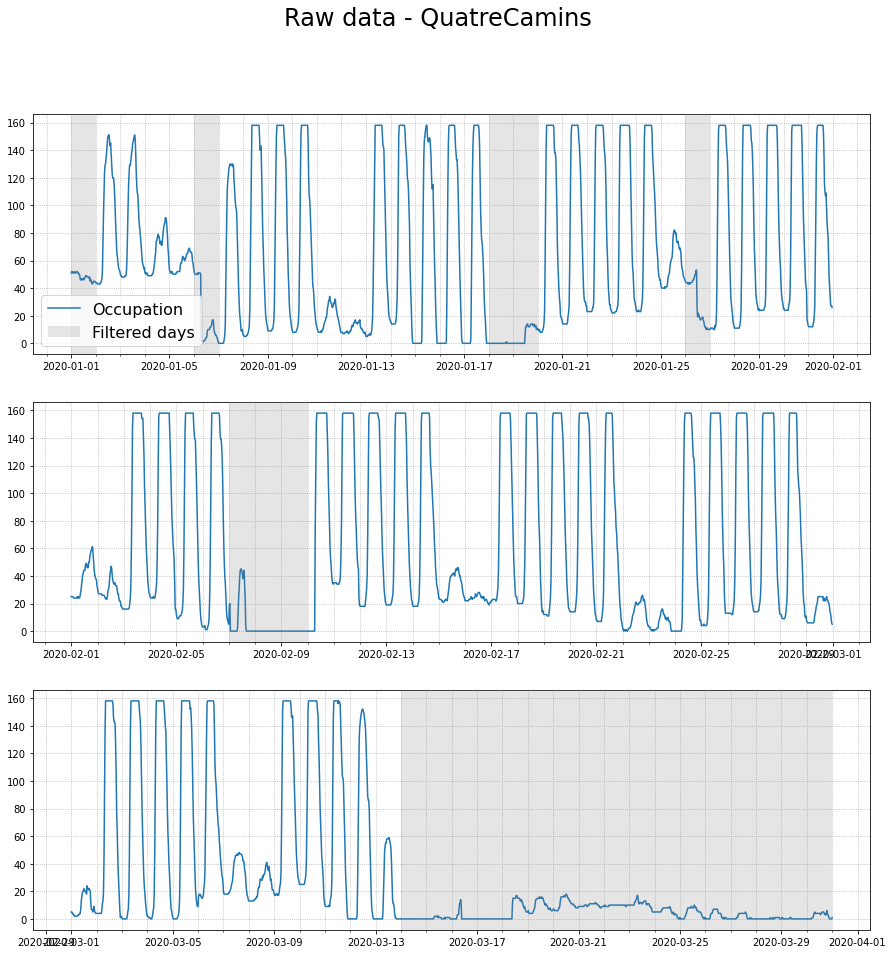

In [746]:
fig, ax = plt.subplots(3,1,figsize=(15,15))

#fig, ax = plt.subplots(1,3)

fig.suptitle('Raw data - '+current_parking, fontsize=24)
#plt.subplot(3,1,1)
indxJan=x_date<pd.to_datetime("2020-02-01")


ax[0].plot(x_date[indxJan],y_occ[indxJan], label='Occupation')
ax[0].grid(which='major',linestyle='dotted')
ax[0].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[0].grid(which='minor', linestyle=':')

td_days_list=pd.to_datetime(days_list)
index_dates=td_days_list<pd.to_datetime("2020-02-01")

days_list01=list(compress(days_list, index_dates))
bol_once=True
for datestr in days_list01:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[0].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    if bol_once:
        ax[0].legend(fontsize=16)
        bol_once=False
    
#plt.subplot(3,1,2)
indxFeb=((x_date<pd.to_datetime("2020-03-01")) & (x_date>=pd.to_datetime("2020-02-01")))

ax[1].plot(x_date[indxFeb],y_occ[indxFeb])
ax[1].grid(which='major',linestyle='dotted')
ax[1].xaxis.set_minor_locator(AutoMinorLocator(4))
ax[1].grid(which='minor', linestyle=':')

index_dates=(td_days_list<pd.to_datetime("2020-03-01")) & (td_days_list>pd.to_datetime("2020-01-31"))
days_list02=list(compress(days_list, index_dates))
for datestr in days_list02:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[1].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    

#plt.subplot(3,1,3)
indxMar=((x_date<pd.to_datetime("2020-04-01")) & (x_date>=pd.to_datetime("2020-03-01")))

ax[2].plot(x_date[indxMar],y_occ[indxMar]);
ax[2].grid(which='major',linestyle='dotted')
ax[2].xaxis.set_minor_locator(AutoMinorLocator(1))
ax[2].grid(which='minor', linestyle=':')
           
index_dates=(td_days_list<pd.to_datetime("2020-04-01")) & (td_days_list>pd.to_datetime("2020-02-29"))
days_list03=list(compress(days_list, index_dates))
for datestr in days_list03:
    initDate= pd.to_datetime(datestr)
    finDate=pd.to_datetime(datestr +' 23:59:00')
    ax[2].axvspan(initDate,finDate, facecolor='grey', alpha=0.2, label='Filtered days', zorder=4)
    

In [747]:
df['Stable Data'] = df['Date'].apply(lambda x: checkDataValidty(x))
df_holidays = df[df['Stable Data'] == False]
df = df[df["Stable Data"] == True]

## Mean free slots by weekday

In [748]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

df_days = df.groupby([df['Weekday']], as_index=False).mean()

# REORDER BY DAY
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
key = df_days['Weekday'].map(mapping)
df_days = df_days.iloc[key.argsort()]
df_days.reset_index(inplace=True, drop=True) 

#df_bla = df.groupby('Weekday').agg({'score': ['mean', 'std']})

In [749]:
# cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# # esta bien esto?
# df_days = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})
# # df_days = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})

# # REORDER BY DAY
# days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
# mapping = {day: i for i, day in enumerate(days)}
# df_days.reset_index(inplace=True, drop=False) 
# key = df_days['Weekday'].map(mapping)
# df_days = df_days.iloc[key.argsort()]
# df_days.reset_index(inplace=True, drop=True) 
# means = df_days['Occupancy']['mean']
# stds = df_days['Occupancy']['std']
# df

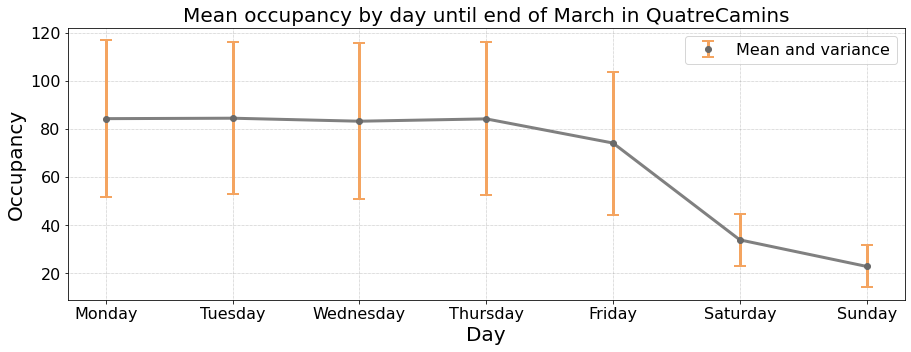

In [750]:
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_days_ = df.groupby('Weekday').agg({'Occupancy': ['mean', 'std']})
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday']
mapping = {day: i for i, day in enumerate(days)}
df_days_.reset_index(inplace=True, drop=False) 
key = df_days_['Weekday'].map(mapping)
df_days_ = df_days_.iloc[key.argsort()]
df_days_.reset_index(inplace=True, drop=True) 
means = df_days_['Occupancy']['mean']
stds = df_days_['Occupancy']['std']

x = df_days_['Weekday']
y = means
err = stds
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x,y, color='grey',  linewidth=3)
plt.errorbar(x, y,
            xerr=None,
            yerr=err/2, fmt='o',color='dimgray',label="Mean and variance",
             ecolor='sandybrown', elinewidth=3, capsize=6, capthick=2)
plt.title('Mean occupancy by day until end of March in '+current_parking, fontsize=20)
plt.xlabel('Day', fontsize = 20)
plt.ylabel('Occupancy', fontsize = 20)
plt.legend(fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
df = df.reset_index(drop = True)

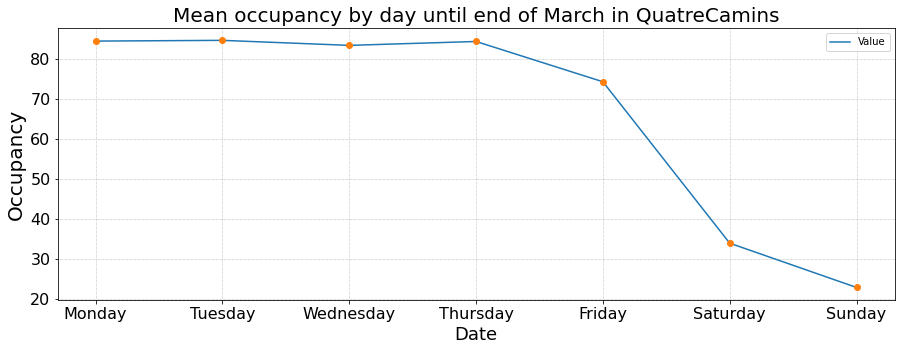

In [751]:
x = df_days['Weekday']
y = df_days['Occupancy']
fig, ax = plt.subplots(figsize=(15,5))
plt.plot(x,y, label='Value')
plt.plot(x,y,'o')
plt.title('Mean occupancy by day until end of March in '+current_parking, fontsize=20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Occupancy', fontsize = 20)
plt.legend()
# changing the fontsize of yticks
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
# plt.xticks(fonstize=14)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
df = df.reset_index(drop = True)

In [752]:
df_days['Occupancy']

0    84.407407
1    84.590437
2    83.337500
3    84.308712
4    74.250000
5    33.940104
6    22.886905
Name: Occupancy, dtype: float64

## Compute the mean for different days

In [753]:
def toAbsHour(hour):
    beginning = [int(s) for s in hour.split(':')]
    absol_hour = (beginning[0] + beginning[1]/60 )
    return absol_hour

df_byhour = df
df_byhour['ABS_Hour'] = df_byhour['Time'].apply(lambda x: toAbsHour(x) )

df_hours = df_byhour
df_hours['hour'] = df_hours['ABS_Hour'].map(lambda x: (int(2*x))/2)


# Normalization

In [754]:
def Area_by_date(date):
    df_day = df[(df['Date'] == date)]
    Profile = df_day['Occupancy'].values
    Area = integrate.simps(Profile)
    return Area

df_hours['Area'] = df_hours['Date'].apply(lambda x: Area_by_date(x))

def df_normalization(occ, area):
    if area == 0:
        return 'error'
    return occ/area

df_hours['Normalized_occupancy'] = df_hours.apply(lambda x: df_normalization(x.Occupancy, x.Area), axis=1)

#df_hours = df_hours.drop(['Occupancy'], axis=1)
#df_hours['Occupancy'] = df_hours['Normalized_occupancy'].apply(lambda x: x)
df_mean_slots = df_hours.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()

In [755]:
mean_occupancy = df_mean_slots['Occupancy']

In [756]:
Monday_occ = mean_occupancy['Monday']
Tuesday_occ = mean_occupancy['Tuesday']
Wednesday_occ = mean_occupancy['Wednesday']
Thursday_occ = mean_occupancy['Thursday']
Friday_occ = mean_occupancy['Friday']
Saturday_occ = mean_occupancy['Saturday']
Sunday_occ = mean_occupancy['Sunday']

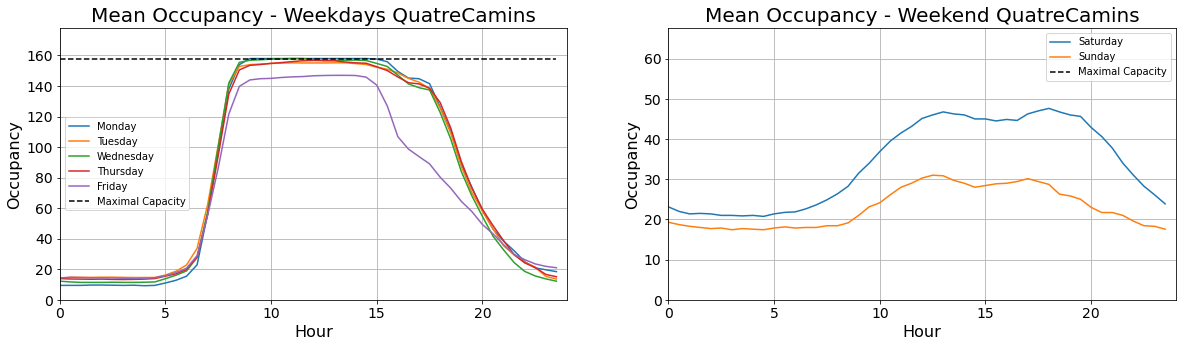

In [757]:
fig = plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
maximal_line = np.zeros(48)+max_value;
time=np.linspace(0,23.5,48);


plt.plot(Monday_occ,label='Monday')
plt.plot(Tuesday_occ,label='Tuesday')
plt.plot(Wednesday_occ,label='Wednesday')
plt.plot(Thursday_occ, label='Thursday')
plt.plot(Friday_occ,label='Friday')
plt.plot(time, maximal_line,'--',color='black',label='Maximal Capacity')

plt.title('Mean Occupancy - Weekdays '+current_parking, fontsize=20)
plt.xlabel('Hour', fontsize=16); plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(labelsize=14)
plt.axis([0, 24, 0, axis_ylim])
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(Saturday_occ,label='Saturday')
plt.plot(Sunday_occ,label='Sunday')
plt.plot(time, maximal_line,'--',color='black',label='Maximal Capacity')

axis_ylim_we=max(max(Saturday_occ),max(Sunday_occ))+20

plt.title('Mean Occupancy - Weekend '+current_parking, fontsize=20)
plt.xlabel('Hour', fontsize=16); plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(labelsize=14)
plt.axis([0, 24, 0, axis_ylim_we])
plt.legend()
plt.grid()

## Variance computation

In [758]:
def mean_day(Weekday,date):
    df = df_hours[(df_hours['Weekday'] == Weekday)]
    df_day = df[(df['Date'] == date)]
    df_day_mean = df_day.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Weekday]
    return Day

def generate_mean_variance(accumulated_date, accumulated_free_slots):
    aux_dict = {};
    for ii in np.arange(len(accumulated_date)):
        free_slots = list(accumulated_free_slots[ii].iat)
        hour = list(accumulated_free_slots[ii].index)
        for jj in np.arange(len(free_slots)):
            current_hour = hour[jj]
            if current_hour not in aux_dict:
                aux_dict[current_hour] = []
            aux_dict[current_hour].append(free_slots[jj])
    return aux_dict

def compute_mean_variance(aux_dict):
    domain = np.linspace(0,23,47)
    var_vec = []; mean_vec = []; hour_vec=[];
    for ii in domain:
        if ii in aux_dict:
            var_vec.append(np.var(list(aux_dict[ii])))
            mean_vec.append(np.mean(list(aux_dict[ii])))
            hour_vec.append(ii)
    return var_vec, mean_vec, hour_vec

### Visualize days

48
48
48
48
48
48
48
48
48


Text(0.5, 0, 'Time [h], 0.5 step ')

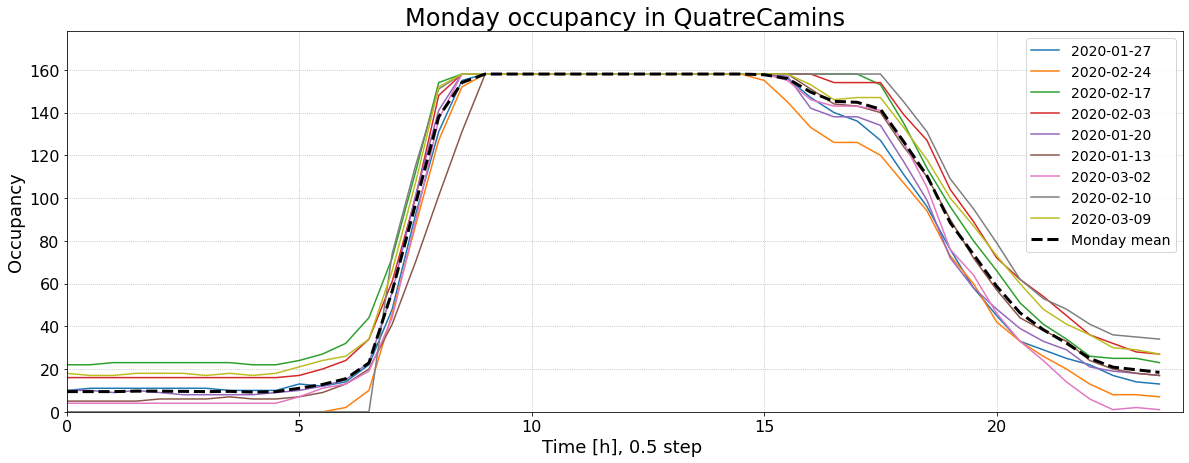

In [759]:
Weekday = 'Monday'
Day_df = df_hours[(df_hours['Weekday'] == Weekday)]
dates = Day_df['Date']
dates_options = set(dates[:][:])
dates_options = list(dates_options)
lockdown_dates=[];
#lockdown_dates.append('06/01/2020')
# lockdown_dates.append('16/01/2020')
# lockdown_dates.append('30/01/2020')
# lockdown_dates.append('23/01/2020')

fig = plt.figure(figsize = (20,7))
accumulated_free_slots=[];
accumulated_date=[];

for ii in np.arange(len(dates_options)):
    day = dates_options[ii]
    Day = mean_day(Weekday,day)
    aux_vec=np.zeros(24)
    Day_list = list(Day)
    accumulated_date.append(day)
    accumulated_free_slots.append(Day)
    plt.plot(Day,label=day)
    print(len(Day.values))
    
label_tag = Weekday + ' mean'
plt.title('Monday occupancy in '+current_parking, fontsize=24)
plt.plot(Monday_occ,'--', color='black', label = label_tag, linewidth=3)
plt.axis([0, 24, axis_ylim_low, axis_ylim])
plt.grid(linestyle='dotted')
plt.legend(fontsize=14)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel('Occupancy', fontsize=18)
plt.xlabel('Time [h], 0.5 step ', fontsize=18)

# PREDICTION 

### Prepare the data for the prediction

In [760]:
def classify_2_proto(x):
    weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
    if x in weekday_list:
        return 'Weekday'
    else:
        return 'Weekend'


def classify_3_proto(x):
    weekday_list = ['Monday', 'Tuesday', 'Wednesday', 'Thursday']
    weekend_list = ['Saturday', 'Sunday']
    if x in weekday_list:
        return 'Weekday'
    elif x in weekend_list:
        return 'Weekend'
    else:
        return 'Friday'
    

# 1 week data = 336 rows (48*7) WE ASUME WE HAVE COMPLETE DATA WITHOUT GAPS BETWEEN HOURS, AND DATA FROM 0.0 TO 23.5
# @from_end: if the testing data is retrieved from the last part of the df or from th beginning. By default, from the end
# @limit_date: if we want to get the train from specific date instead of by number of weeks

def split_data(df, n_test_weeks, limit_date = None, from_end=True): 
    if(limit_date != None):
        init_test = df[df['Date']==limit_date].index[0];
        end_test = df.shape[0]
        test_domain = range(init_test, end_test)
        test_domain = list(test_domain)

    else:
        if(from_end == True):
            end_test = df.shape[0]
            week_domain = n_test_weeks*336
            init_test = end_test-week_domain
            test_domain = range(init_test, end_test)
            test_domain = list(test_domain)
            
        elif(from_end == False):
            week_domain = n_test_weeks*336
            init_test = 0
            end_test = week_domain
            test_domain = range(0,week_domain)
            test_domain = list(test_domain)
            
    test_df = df[init_test:end_test]
    training_df = df.drop(test_domain)
    return training_df, test_df

In [761]:
df_byhour['MonthNumber']= df_byhour['Date'].apply(lambda x: x.split('-')[1])
df_prediction_mean = df_byhour.groupby(by=['Date','hour','MonthNumber','Weekday'], axis = 0, as_index=False).mean()
df_prediction_mean['Profile_2'] = df_prediction_mean['Weekday'].apply(lambda x: classify_2_proto(x))
df_prediction_mean['Profile_3'] = df_prediction_mean['Weekday'].apply(lambda x: classify_3_proto(x))

### Split data in Training/Testing df

In [762]:
number_of_testing_weeks = 3
df_training, df_testing = split_data(df_prediction_mean, number_of_testing_weeks)
df_train_data = df_training
df_train_data.head(5)
df_testing.head()

Date  hour MonthNumber   Weekday  Free slots  Occupancy  \
2113  2020-02-22   0.5          02  Saturday         157          1   
2114  2020-02-22   1.0          02  Saturday         158          0   
2115  2020-02-22   1.5          02  Saturday         157          1   
2116  2020-02-22   2.0          02  Saturday         157          1   
2117  2020-02-22   2.5          02  Saturday         158          0   

      Stable Data  ABS_Hour        Area Profile_2 Profile_3  
2113         True       0.5  556.916667   Weekend   Weekend  
2114         True       1.0  556.916667   Weekend   Weekend  
2115         True       1.5  556.916667   Weekend   Weekend  
2116         True       2.0  556.916667   Weekend   Weekend  
2117         True       2.5  556.916667   Weekend   Weekend

## PREDICTION BY MEAN

In [763]:
def mean_day_profile(Profile, df_aux):
    df = df_aux[(df_aux['Profile_2'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_2','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Profile]
    return Day

def mean_of_day(Weekday,date):
    df = df_hours[(df_hours['Weekday'] == Weekday)]
    df_day = df[(df['Date'] == date)]
    df_day_mean = df_day.groupby(by=['Weekday','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    Day = mean_free_slots[Weekday]
    return Day

# Get all days of the type (Monday, Tuesday...) and return the mean of them
def get_days(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

# Get unique dates of the type (Monday, Tuesday...) 
def get_dates(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    dates = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        t_date = data_temp.iloc[i]['Date']
        if len(day) == 48:
            dates.append(t_date)
        
    return dates

def get_days_of_protos(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days


In [764]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)


testing_mondays_dates    = get_dates("Monday", df_testing)
testing_tuesdays_dates   = get_dates("Tuesday", df_testing)
testing_wednesdays_dates = get_dates("Wednesday", df_testing)
testing_thursdays_dates  = get_dates("Thursday", df_testing)
testing_fridays_dates    = get_dates("Friday", df_testing)
testing_saturdays_dates  = get_dates("Saturday", df_testing)
testing_sundays_dates    = get_dates("Sunday", df_testing)

In [765]:
# ------------------------ TESTING DATA -----------------------------

real_monday = mean_of_day('Monday','2020-02-24')
real_tuesday = mean_of_day('Tuesday','2020-02-11')
real_wednesday = mean_of_day('Wednesday','2020-02-26')
real_thursday = mean_of_day('Thursday','2020-02-27')

################## Bad/None data on last Feb week ############################
real_friday = mean_of_day('Friday','2020-03-06') 
real_saturday= mean_of_day('Saturday','2020-03-07')
real_sunday = mean_of_day('Sunday','2020-03-08')

### 3 Prototypes: Weekday, Friday & Weekend

In [766]:
def mean_day_profile_3(Profile, df_aux):
    df = df_aux[(df_aux['Profile_3'] == Profile)]
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    profile = mean_free_slots[Profile]
    return profile

In [767]:
# Obtain the 3 protoypes. IMPORTANT! We assume all the data in df is valid, robust and correct
def train_statistical_model(df): 
    df_day_mean = df.groupby(by=['Profile_3','hour'], axis = 0, group_keys=True).mean()
    mean_free_slots = df_day_mean['Occupancy']
    return mean_free_slots['Weekday'], mean_free_slots['Friday'], mean_free_slots['Weekend'] 

weekdays = ['Monday', 'Thursday', 'Wednesday', 'Tuesday']
weekend= ['Saturday', 'Sunday']

# Simply return the proper prototype
def predict_full_day_statistical(day): 
    if day in weekdays: 
        return hist_weekday_proto
    elif day in weekend: 
        return hist_weekend_proto
    else:
        return hist_friday_proto


def get_proto_by_day(day_name):
    if day in ['Monday', 'Tuesday', 'Wednesday', 'Thursday']:
        return 
    return


def get_scale_factor(current_data, proto):
    index = len(current_data)
    proto_val = proto[index-1]
    last_hour_val = current_data[-1]
    scaling = last_hour_val/proto_val
    return scaling 


def predict_real_time(day, current_hour, current_value, max_capacity, pred_type):
    if pred_type == "Stat":
        proto = get_proto_by_day(day) #Get from statistical prototypes
    else: 
        scale_factor = get_scale_factor(current_value, proto_value)
        prediction = np.array(proto)*scale_factor
    return prediction


In [768]:
hist_weekday_proto, hist_friday_proto, hist_weekend_proto = train_statistical_model(df_train_data)
prediction = predict_full_day_statistical('Monday')

#### Plotting  prototypes

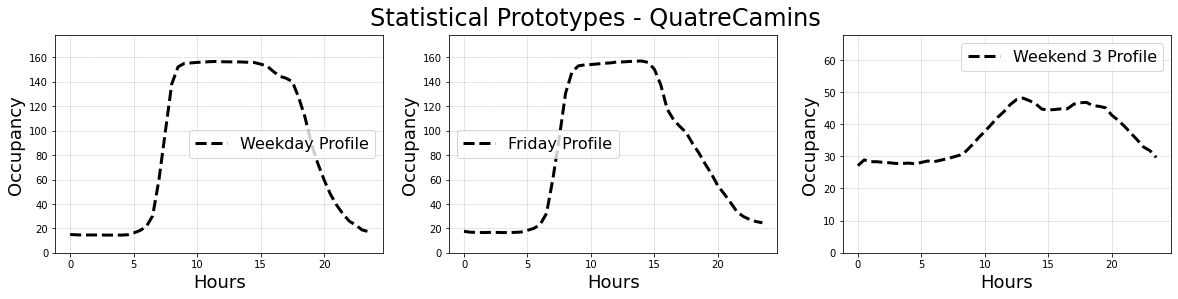

In [769]:
Weekday_proto = mean_day_profile_3('Weekday',df_train_data)
Weekend_proto = mean_day_profile_3('Weekend',df_train_data)
df_fri = df_train_data.drop(df_train_data[df_train_data['Date'] == '2020-02-07' ].index)
Friday_proto = mean_day_profile_3('Friday',df_fri)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Statistical Prototypes - '+current_parking, fontsize=24)

ax[0].plot(hist_weekday_proto, linestyle='--', label='Weekday Profile', color='k', linewidth=3)
# ax[0].plot(real_monday.index.tolist(), real_monday.values.tolist(), label='Monday')
# ax[0].plot(real_tuesday.index.tolist(), real_tuesday.values.tolist(), label='Tuesday')
# ax[0].plot(real_wednesday.index.tolist(), real_wednesday.values.tolist(), label='Wednesday')
# ax[0].plot(real_thursday.index.tolist(), real_thursday.values.tolist(), label='Thursday')
ax[0].set_ylim([0,axis_ylim])
# ax[0].set_title("Weekday prototype")
ax[0].set_ylabel('Occupancy', fontsize=18)
ax[0].set_xlabel('Hours', fontsize=18)
ax[0].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[0].legend(fontsize=16)

ax[1].plot(hist_friday_proto, linestyle='--', label='Friday Profile', color='k', linewidth=3)
# ax[1].plot(real_friday.index.tolist(), real_friday.values.tolist(), label='Friday')
ax[1].set_ylim([0,axis_ylim])
# ax[1].set_title("Friday prototype")
ax[1].set_ylabel('Occupancy', fontsize=18)
ax[1].set_xlabel('Hours', fontsize=18)
ax[1].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[1].legend(fontsize=16)

ax[2].plot(hist_weekend_proto, linestyle='--', label='Weekend 3 Profile', color='k', linewidth=3)
# ax[2].plot(real_saturday.index.tolist(), real_saturday.values.tolist(), label='Saturday')
# ax[2].plot(real_sunday.index.tolist(), real_sunday.values.tolist(), label='Sunday')
ax[2].set_ylim([0,axis_ylim_we])
# ax[2].set_title("Weekend prototype")
ax[2].set_ylabel('Occupancy', fontsize=18)
ax[2].set_xlabel('Hours', fontsize=18)
ax[2].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[2].legend(fontsize=16);
# fig.tight_layout(pad=3.0)


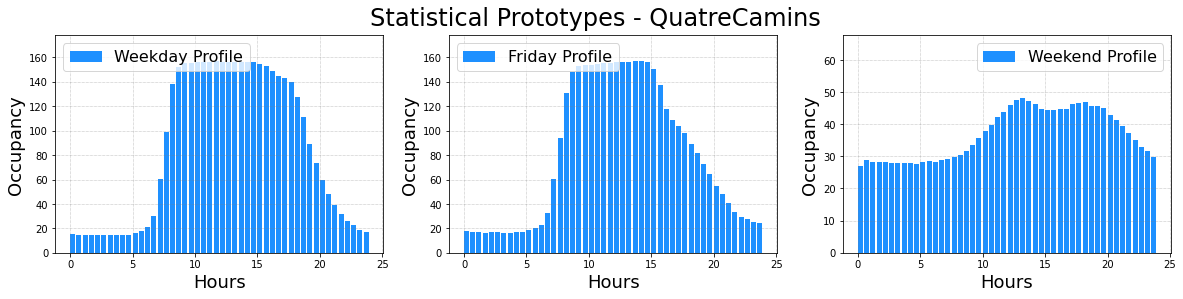

In [770]:
Weekday_proto = mean_day_profile_3('Weekday',df_train_data)
Weekend_proto = mean_day_profile_3('Weekend',df_train_data)
df_fri = df_train_data.drop(df_train_data[df_train_data['Date'] == '2020-02-07' ].index)
Friday_proto = mean_day_profile_3('Friday',df_fri)

fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Statistical Prototypes - '+current_parking, fontsize=24)

ax[0].bar(hist_weekday_proto.index +0.2,hist_weekday_proto.values, width=0.4, label='Weekday Profile', color='dodgerblue', linewidth=3)
ax[0].set_ylim([0,axis_ylim])
# ax[0].set_title("Weekday prototype")
ax[0].set_ylabel('Occupancy', fontsize=18)
ax[0].set_xlabel('Hours', fontsize=18)
ax[0].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[0].legend(fontsize=16)

ax[1].bar(hist_friday_proto.index +0.2,hist_friday_proto.values, width=0.4, label='Friday Profile', color='dodgerblue', linewidth=3)
ax[1].set_ylim([0,axis_ylim])
# ax[1].set_title("Friday prototype")
ax[1].set_ylabel('Occupancy', fontsize=18)
ax[1].set_xlabel('Hours', fontsize=18)
ax[1].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[1].legend(fontsize=16)

ax[2].bar(hist_weekend_proto.index +0.2, hist_weekend_proto.values, width=0.4, label='Weekend Profile', color='dodgerblue', linewidth=3)

ax[2].set_ylim([0,axis_ylim_we])
# ax[2].set_title("Weekend prototype")
ax[2].set_ylabel('Occupancy', fontsize=18)
ax[2].set_xlabel('Hours', fontsize=18)
ax[2].grid(linestyle='dotted', linewidth='0.5', color='grey')
ax[2].legend(fontsize=16);
# fig.tight_layout(pad=3.0)


In [771]:
def subplot_training(fig, ax, xx, yy, proto_data, test_days, day, proto_name): 
    ax[xx,yy].plot(time, proto_data, linewidth=2.5, linestyle='dashed', label= proto_name + ' prediction')
    ax[xx,yy].legend(fontsize=16)
    for i in range(0, len(test_days)): 
        ax[xx, yy].plot(time, test_days[i], linewidth=0.75, label='Testing ' + day )
    ax[xx,yy].grid(linestyle='dotted')
    ax[xx,yy].set_ylim(0,axis_ylim)
    ax[xx,yy].set_xlabel('Time (hours)', fontsize=16)
    ax[xx,yy].set_ylabel('Occupancy', fontsize=16)

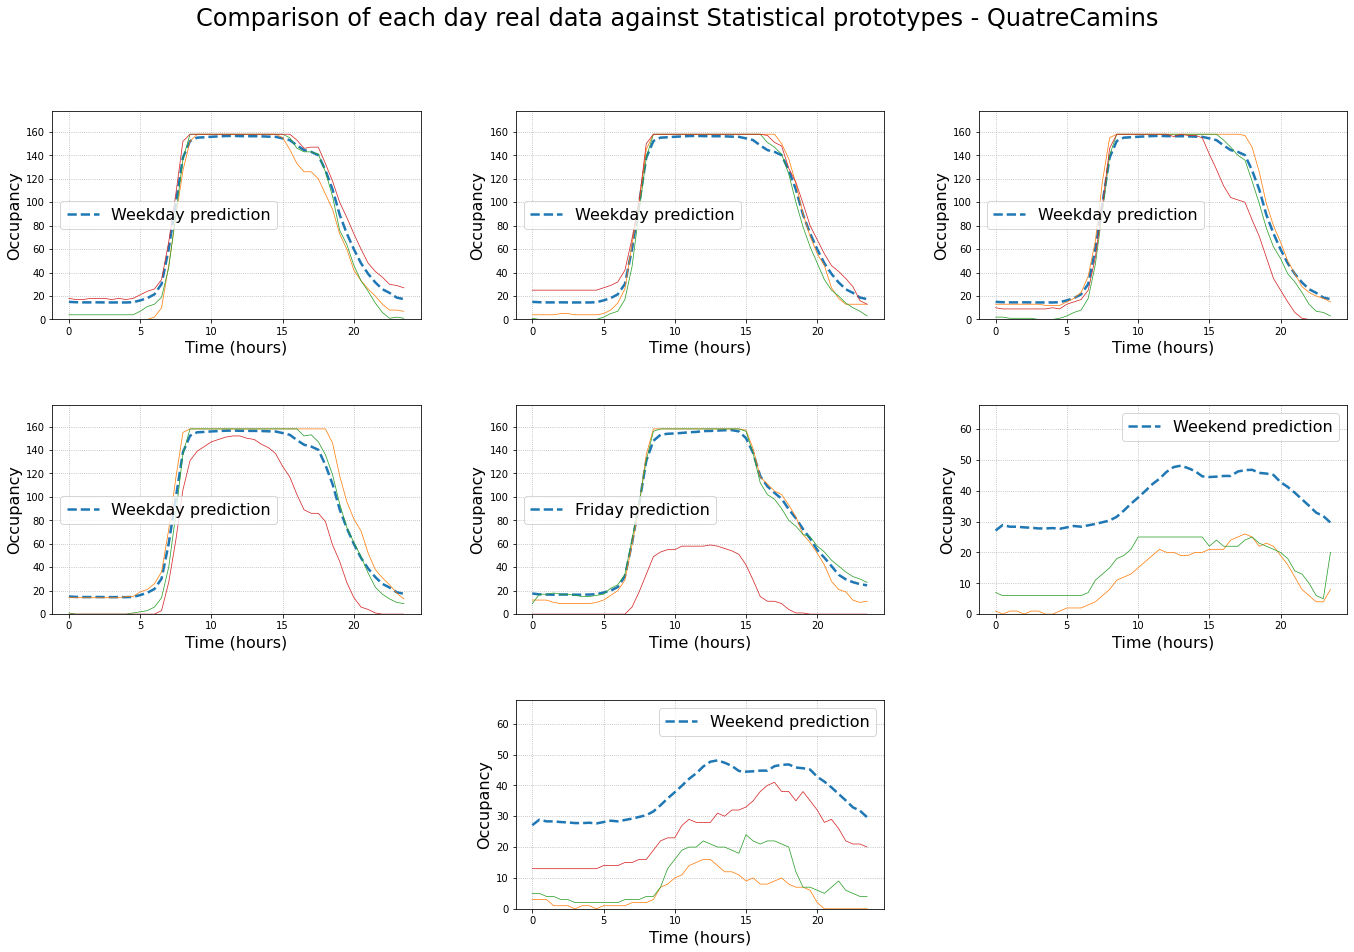

In [772]:
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(14)
fig.suptitle('Comparison of each day real data against Statistical prototypes - '+current_parking, fontsize=24)

subplot_training(fig, ax, 0, 0, Weekday_proto.values, testing_mondays, 'Monday', 'Weekday')
subplot_training(fig, ax, 0, 1, Weekday_proto.values, testing_tuesdays, 'Tuesday', 'Weekday')
subplot_training(fig, ax, 0, 2, Weekday_proto.values, testing_wednesdays, 'Wednesday', 'Weekday')
subplot_training(fig, ax, 1, 0, Weekday_proto.values, testing_thursdays, 'Thursday', 'Weekday')
subplot_training(fig, ax, 1, 1, Friday_proto.values, testing_fridays, 'Friday', 'Friday')
subplot_training(fig, ax, 1, 2, Weekend_proto.values, testing_saturdays, 'Saturday', 'Weekend')
subplot_training(fig, ax, 2, 1, Weekend_proto.values, testing_sundays, 'Sunday', 'Weekend')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
ax[2,1].set_ylim(0,axis_ylim_we)
ax[1,2].set_ylim(0,axis_ylim_we)
fig.tight_layout(pad=5)


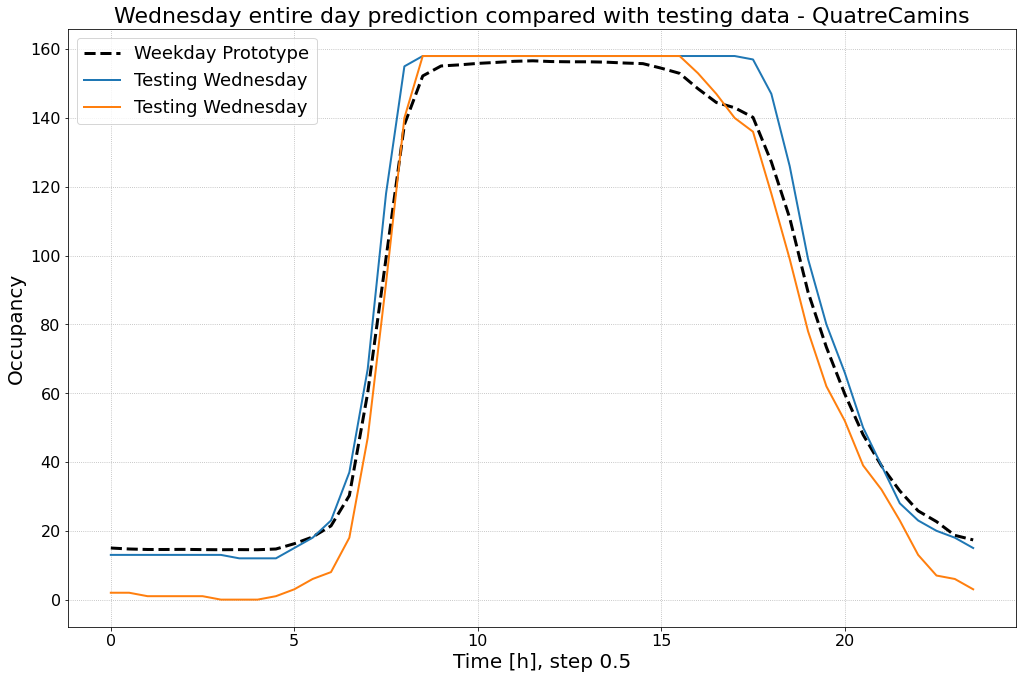

In [773]:
fig = plt.figure(figsize=(17,11))
plt.title('Wednesday entire day prediction compared with testing data - '+current_parking, fontsize = 22)
plt.plot(time, Weekday_proto.values, linestyle='dashed', linewidth=3, color='black', label='Weekday Prototype')
plt.plot(time, testing_wednesdays[0], linewidth=2, label="Testing Wednesday")
plt.plot(time, testing_wednesdays[1], linewidth=2, label="Testing Wednesday")
# plt.plot(time, testing_wednesdays[3], linewidth=2, label="Testing Wednesday")
plt.grid(linestyle='dotted')
plt.legend(fontsize=18);
plt.xlabel('Time [h], step 0.5', fontsize=20)
plt.ylabel('Occupancy', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

#### Computing errors for 3 prototypes

In [774]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_stat = compute_testing_prop_error(testing_mondays, Weekday_proto.values)
error_tuesday_stat = compute_testing_prop_error(testing_tuesdays, Weekday_proto.values)
error_wednesday_stat = compute_testing_prop_error(testing_wednesdays, Weekday_proto.values)
error_thursday_stat = compute_testing_prop_error(testing_thursdays, Weekday_proto.values)
error_friday_stat = compute_testing_prop_error(testing_fridays, Friday_proto.values)
error_saturday_stat = compute_testing_prop_error(testing_saturdays, Weekend_proto.values)
error_sunday_stat = compute_testing_prop_error(testing_sundays, Weekend_proto.values)

______MEAN________
5.089034558971267
4.65641952983725
5.754282198111311
8.412133313240908
14.854581072935503
14.589047116736992
14.98901195499297
______STDV________
2.6966050469377985
2.4630870642055305
3.9638536156473596
4.935663946350966
7.350356997580305
1.7469118010567883
1.5184289557340862


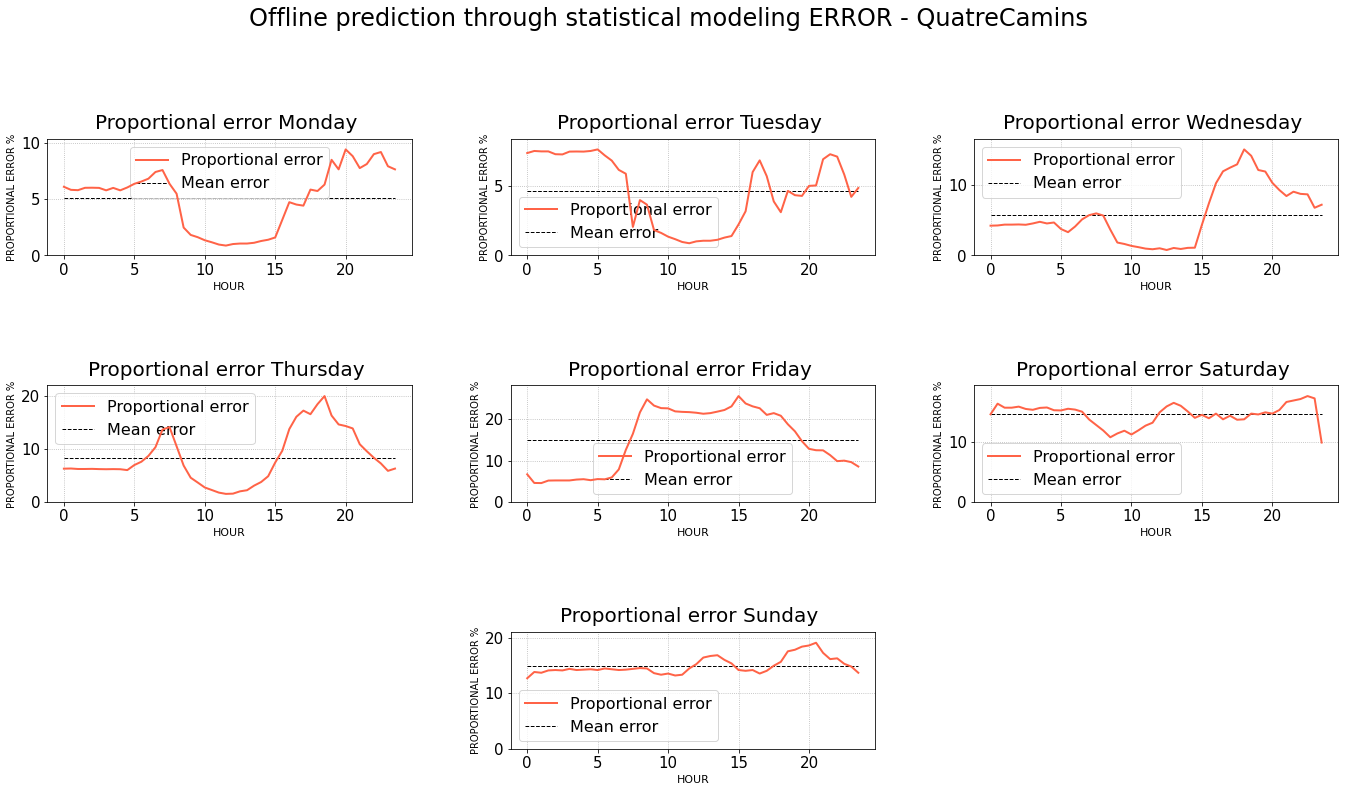

In [775]:
def subplotStatErr(fig, ax, axx, axy, x, error, mean, title, day ):
    ax[axx,axy].plot(x, error, color="tomato", linewidth=2, zorder=10, label='Proportional error')
    ax[axx,axy].plot(x, mean, linewidth=1, linestyle='--' ,color='black', label='Mean error')
    ax[axx,axy].grid(linestyle='dotted')
    ax[axx,axy].legend(loc='upper left', fontsize=10)
    ax[axx,axy].set_ylabel('Proportional error %', fontsize=20)
    ax[axx,axy].set_xlabel('Hours', fontsize=30)
    ax[axx,axy].set_title(title, pad=10, fontsize=20)
    ax[axx,axy].set_ylim((0,1.1*max(error)))
    ax[axx,axy].legend(fontsize=16)
    ax[axx,axy].tick_params( labelsize=15)
    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through statistical modeling ERROR - '+ current_parking, fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 0, time, error_monday_stat, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 1, time, error_tuesday_stat, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_stat)]*len(time)
subplotStatErr(fig, ax, 0, 2, time, error_wednesday_stat, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 0, time, error_thursday_stat, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 1, time, error_friday_stat, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_stat)]*len(time)
subplotStatErr(fig, ax, 1, 2, time, error_saturday_stat, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_stat)]*len(time)
subplotStatErr(fig, ax, 2, 1, time, error_sunday_stat, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)

print('______MEAN________')
print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_stat))
print(np.std(error_tuesday_stat))
print(np.std(error_wednesday_stat))
print(np.std(error_thursday_stat))
print(np.std(error_friday_stat))
print(np.std(error_saturday_stat))
print(np.std(error_sunday_stat))

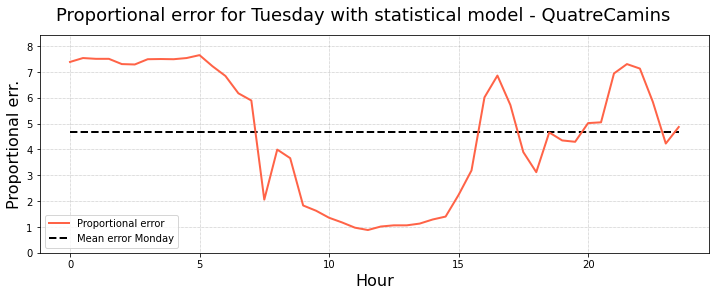

In [776]:
fig = plt.figure(figsize=(12,4))
fig.suptitle('Proportional error for Tuesday with statistical model - '+ current_parking, fontsize=18)
plt.grid(linestyle='dotted', linewidth='0.5', color='grey')
plt.plot(real_tuesday.index.tolist(), error_tuesday_stat, color="tomato", linewidth=2, zorder=10, label='Proportional error')
plt.plot(real_tuesday.index.tolist(), mean_Tuesday, linewidth=2, linestyle='--' ,color='black', label='Mean error Monday')
plt.legend()
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Proportional err.', fontsize=16)
plt.ylim([0,1.1*max(error_tuesday_stat)]);

## NORMALIZATION

In [777]:
def Area_by_date(date):
    df = df_prediction_mean
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy_mod'].values
    Area = integrate.simps(day_occ)
    return Area


def df_normalization(occ, area):
    if area == 0:
        return occ
    return occ/area

def compute_min(date):
    df_day = df[(df['Date'] == date)]
    day_occ = df_day['Occupancy'].values
    return min(day_occ)


df_prediction_mean['Min_value'] = df_prediction_mean['Date'].apply(lambda x: compute_min(x))
df_mean_offset = df_prediction_mean.groupby(['Profile_3'], as_index=False).mean() 
df_mean_offset[['Profile_3','Min_value']]

friday_offset = df_mean_offset.iloc[0]['Min_value']
weekday_offset = df_mean_offset.iloc[1]['Min_value']
weekend_offset = df_mean_offset.iloc[2]['Min_value']

df_prediction_mean['Occupancy_mod'] = df_prediction_mean['Occupancy'] - df_prediction_mean['Min_value']



In [778]:
df_prediction_mean['Area'] = df_prediction_mean['Date'].apply(lambda x: Area_by_date(x))
df_prediction_mean['Normalized_occupancy'] = df_prediction_mean.apply(lambda x: df_normalization(x.Occupancy_mod, x.Area), axis=1)
df_normalized = df_prediction_mean[['Date', 'hour','MonthNumber', 'Normalized_occupancy', 'Weekday', 'Profile_3', 'Occupancy_mod', 'Area', 'Occupancy']].copy()


df_normalized

Date  hour MonthNumber  Normalized_occupancy   Weekday Profile_3  \
0     2020-01-02   0.0          01              0.000437  Thursday   Weekday   
1     2020-01-02   0.5          01              0.000437  Thursday   Weekday   
2     2020-01-02   1.0          01              0.000437  Thursday   Weekday   
3     2020-01-02   1.5          01              0.000000  Thursday   Weekday   
4     2020-01-02   2.0          01              0.000000  Thursday   Weekday   
...          ...   ...         ...                   ...       ...       ...   
3116  2020-03-13  22.0          03              0.000000    Friday    Friday   
3117  2020-03-13  22.5          03              0.000000    Friday    Friday   
3118  2020-03-13  23.0          03              0.000000    Friday    Friday   
3119  2020-03-13  23.5          03              0.000000    Friday    Friday   
3120  2020-03-31   0.0          03              0.000000   Tuesday   Weekday   

      Occupancy_mod         Area  Occupancy  
0                 1  2288.083333         44  
1                 1  2288.083333         44  
2                 1  2288.083333         44  
3                 0  2288.083333         43  
4                 0  2288.083333         43  
...             ...          ...        ...  
3116              0   904.000000          0  
3117              0   904.000000          0  
3118              0   904.000000          0  
3119              0   904.000000          0  
3120              0     0.000000          1  

[3121 rows x 9 columns]

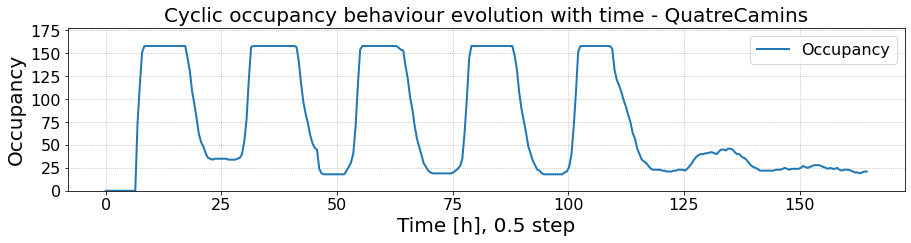

In [779]:
starting_plot = df_normalized[df_normalized['Date']=='2020-02-10'].index[0]
ending_plot = df_normalized[df_normalized['Date']=='2020-02-17'].index[0]

week = df_normalized.iloc[starting_plot:ending_plot]
week_values = week['Occupancy'].values
time = np.linspace(0,164.5,len(week))



fig, ax = plt.subplots(figsize=(15,3))
plt.plot(time, week_values, label='Occupancy', linewidth=2)
plt.title('Cyclic occupancy behaviour evolution with time - '+current_parking, fontsize = 20)
plt.xlabel('Time [h], 0.5 step', fontsize = 20)
plt.ylabel('Occupancy', fontsize = 20)
plt.ylim([0,axis_ylim])
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(linestyle='dotted')
plt.legend(fontsize=16);

In [780]:
def split_data(df, n_test_weeks, limit_date = None, from_end=True): 
    if(limit_date != None):
        init_test = df[df['Date']==limit_date].index[0];
        end_test = df.shape[0]
        test_domain = range(init_test, end_test)
        test_domain = list(test_domain)

    else:
        if(from_end == True):
            end_test = df.shape[0]
            week_domain = n_test_weeks*336
            init_test = end_test-week_domain
            test_domain = range(init_test, end_test)
            test_domain = list(test_domain)
            
        elif(from_end == False):
            week_domain = n_test_weeks*336
            init_test = 0
            end_test = week_domain
            test_domain = range(0,week_domain)
            test_domain = list(test_domain)
            
    test_df = df[init_test:end_test]
    training_df = df.drop(test_domain)
    return training_df, test_df

In [781]:
df_training, df_testing = split_data(df_normalized, 3)

In [782]:
#pd.set_option('display.max_rows', None)
#df_testing.sort_values(by='Area', ascending=True)

In [783]:
#pd.set_option('display.max_rows', 5)

In [784]:
df_training['Area'] = df_training['Date'].apply(lambda x: Area_by_date(x))
df_training

df_mean_areas = df_training.groupby(['Profile_3'], as_index=False).mean() 
df_mean_areas[['Profile_3', 'Area']]

friday_area = df_mean_areas.iloc[0]['Area']
weekday_area = df_mean_areas.iloc[1]['Area']
weekend_area = df_mean_areas.iloc[2]['Area']

print('Weekday area: ' , weekday_area)
print('Friday area: ' , friday_area)
print('Weekend area: ' , weekend_area)

# df_normalized

Weekday area:  3516.6577380952117
Friday area:  3082.0952380952285
Weekend area:  523.6141262509632


In [785]:
def get_days_normalized(dayname, df_):
    data_temp = df_[df_['Weekday'] == dayname] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
    return days

def get_days_of_protos_normalized(proto_name, df_):
    data_temp = df_[df_['Profile_3'] == proto_name] 
    days = []
    for i in range(0,data_temp.shape[0], 48):
        day = data_temp['Normalized_occupancy'][i:i+48]
        if len(day) == 48:
            days.append(day)
        
    return days

In [786]:
# ------------------------ NEW TESTING DATA -----------------------------
# these variables are arrays of days
testing_mondays_norm    = get_days_normalized("Monday", df_testing)
testing_tuesdays_norm   = get_days_normalized("Tuesday", df_testing)
testing_wednesdays_norm = get_days_normalized("Wednesday", df_testing)
testing_thursdays_norm  = get_days_normalized("Thursday", df_testing)
testing_fridays_norm    = get_days_normalized("Friday", df_testing)
testing_saturdays_norm  = get_days_normalized("Saturday", df_testing)
testing_sundays_norm    = get_days_normalized("Sunday", df_testing)

testing_mondays    = get_days("Monday", df_testing)
testing_tuesdays   = get_days("Tuesday", df_testing)
testing_wednesdays = get_days("Wednesday", df_testing)
testing_thursdays  = get_days("Thursday", df_testing)
testing_fridays    = get_days("Friday", df_testing)
testing_saturdays  = get_days("Saturday", df_testing)
testing_sundays    = get_days("Sunday", df_testing)

In [787]:
training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
# for ii in range(len(training_weekdays_norm)):
#     plt.plot(time,training_weekdays_norm[ii])

In [788]:
pd.set_option("max_rows", None)
df_training[df_training.Weekday=='Sunday']
pd.set_option("max_rows", 10)

In [789]:
def plot_model_tn_pres(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de

    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    xlims = [0, 23.58]
    ylims = [-0.2, 8.2]
    figsize = (10,5)
    
    if False:
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_ar, '-b', label='arribades', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_de, '-r', label='sortides', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, pdf_ar, '-b', label='arribades', linewidth=2)
        plt.plot(time, pdf_de, '-r', label='sortides', linewidth=2)
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Densitat de probabilitat', fontsize = 20)
        plt.xlim(xlims)
        plt.ylim(ylims)  
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16)
        plt.legend(fontsize=16)
    
        fig, ax = plt.subplots(figsize=figsize)
        plt.plot(time, cdf_ar, '--b', label='sa:suma d\'arribades', linewidth=2)
        plt.plot(time, cdf_de, '--r', label='ss:suma de sortides',  linewidth=2)
        #ax[1].plot(time, cdf_ar , '--b')
        #ax[1].plot(time, cdf_de, '--r')
        #ax[1].plot(time, cdf_ar-cdf_de, 'r')
        plt.xlabel('temps (x)', fontsize = 20)
        plt.title('Probabilitat acumulada', fontsize = 20)
        plt.xlim(xlims)
        plt.xticks(fontsize=16)
        plt.yticks(fontsize=16)
        plt.grid(linestyle='dotted')
        plt.legend(fontsize=16, loc='upper left')
        
    plt.plot(time, cdf_ar, '--b', label='sa:suma d\'arribades', linewidth=2)
    plt.plot(time, cdf_de, '--r', label='ss:suma de sortides',  linewidth=2)
    #ax[1].plot(time, cdf_ar , '--b')
    #ax[1].plot(time, cdf_de, '--r')
    #ax[1].plot(time, cdf_ar-cdf_de, 'r')
    plt.plot(time, cdf_ar-cdf_de, 'k',label='Resta sa-ss', linewidth=3)
    plt.xlabel('temps (x)', fontsize = 20)
    plt.title('Probabilitat acumulada', fontsize = 20)
    plt.xlim(xlims)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.grid(linestyle='dotted')
    plt.legend(fontsize=16, loc='upper left')
    
    plt.show()

## MATHEMATICAL MODEL - CDF Subtraction

In [790]:
# ********************************************** WEEKDAY *************************************************************
#from scipy.special import tna, factorial
from scipy.stats import truncnorm 
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error
time = np.linspace(0,23.5,48)
time_tn=time/24

def generate_cdf(data):
    cumulative=[0]
    for ii in range(1,len(data)):
        cumulative.append(sum(data[:ii]))
    return cumulative/sum(data)

 
def tn(x, loc, scale):
    a = -loc/scale
    b = (1-loc)/scale
    return truncnorm.pdf(x, a, b, loc, scale)


def tn_cdf(x, loc, scale):
    a = -loc/scale
    b = (1-loc)/scale
    return truncnorm.cdf(x, a, b, loc, scale)


training_weekdays_norm  = get_days_of_protos_normalized("Weekday", df_training)
training_fridays_norm  = get_days_of_protos_normalized("Friday", df_training)
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]
# t = []
# for i in range(0,len(training_weekends_norm)):
#     if training_weekends_norm[i].mean() != 0:
#         t.append(training_weekends_norm[i])
        
# training_weekends_norm = t
wd_length = len(training_weekdays_norm)
f_length = len(training_fridays_norm)
we_length = len(training_weekends_norm)


def model_weekdays_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
 
    
     # arrivals
    #a_ar = -loc_ar/scale_ar
    #b_ar = (1-loc_ar)/scale_ar

    # departures
    #a_de = -loc_de/scale_de
    #b_de = (1-loc_de)/scale_de
    
    # make tn for arrivals
    # arrival_pdf = tn(time_tn, loc_ar, scale_ar)
    # make tn for departures
    # departure_pdf = tn(time_tn, loc_de, scale_de)
    # compute CDF for arrivals
    # arrival_cdf = generate_cdf(arrival_pdf)
    
    # compute CDF for departures
    # departure_cdf = generate_cdf(departure_pdf)
    #cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    #cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    #res_n = res/sum(res)
    
    #res = np.array(cdf_ar) - np.array(cdf_de)
    res = cdf_ar - cdf_de
    res_n = res/sum(res)
  
    #res_n[res_n>thresh] = thresh
    #plt.plot(res_n)
    #plt.show()
    error = 0  
    for ii in range(0,wd_length):
        day = training_weekdays_norm[ii]
        error += mean_squared_error(res_n, day)

    #plot_model_tn_pres(loc_ar, scale_ar, loc_de, scale_de) 
    #print("mua = " + str(loc_ar) + "\tstda  = " + str(scale_ar))
    #print("mus = " + str(loc_de) + "\tstds = " + str(scale_de))
    #print("Err = " + str(error))
    return error

def model_weekdays_tn_th(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    thresh=params[4]

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh

    res = cdf_ar - cdf_de
    res_n = res/sum(res)
  
    error = 0  
    for ii in range(0,wd_length):
        day = training_weekdays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error

# params order = a1, b1, a2, b2, rescale
# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
#parameters = np.array([ 2 , 20, 5, 80, 0.02])
#parameters_tn = np.array([.3 ,.05,.8,.1])
parameters_tn = np.array([.2 ,.05,.7,.1])
parameters_tn_th = np.array([.2 ,.05,.7,.1,1])
#optimal_params_weekday = minimize(model_weekdays, parameters, method='Nelder-Mead', tol=0.01)
#optimal_params_weekdaytn = minimize(model_weekdays_tn, parameters_tn, method='Nelder-Mead', tol=0.01)
#optimal_params_weekdaytn = minimize(model_weekdays_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})
optimal_params_weekdaytn = minimize(model_weekdays_tn_th, parameters_tn_th, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})



Optimization terminated successfully.
         Current function value: 0.000148
         Iterations: 343
         Function evaluations: 564


In [791]:
optimal_params_weekdaytn

 final_simplex: (array([[0.32232653, 0.04189012, 0.80605567, 0.07735404, 0.68893075],
       [0.32232656, 0.04189014, 0.80605568, 0.07735404, 0.68893034],
       [0.32232649, 0.0418901 , 0.80605568, 0.07735404, 0.68893121],
       [0.32232648, 0.04189009, 0.80605568, 0.07735405, 0.68893135],
       [0.32232656, 0.04189013, 0.80605567, 0.07735404, 0.68893032],
       [0.32232646, 0.0418901 , 0.80605567, 0.07735404, 0.68893155]]), array([0.00014794, 0.00014794, 0.00014794, 0.00014794, 0.00014794,
       0.00014794]))
           fun: 0.00014794407920248155
       message: 'Optimization terminated successfully.'
          nfev: 564
           nit: 343
        status: 0
       success: True
             x: array([0.32232653, 0.04189012, 0.80605567, 0.07735404, 0.68893075])

In [792]:
def plot_model_tn(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de


    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    fig, ax = plt.subplots(2)
    ax[0].plot(time, pdf_ar , '-b')
    ax[0].plot(time, pdf_de, '-r')
    ax[0].set_title('pdfs')

    ax[1].plot(time, cdf_ar , '--b')
    ax[1].plot(time, cdf_de, '--r')
    ax[1].plot(time, cdf_ar-cdf_de, 'r')
    ax[1].set_title('cdfs')

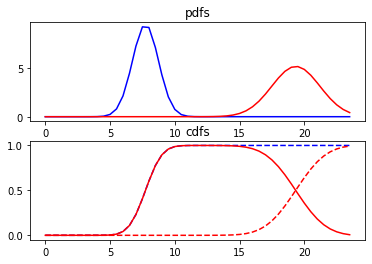

In [793]:
plot_model_tn(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],optimal_params_weekdaytn.x[3])

In [794]:
def plot_model_tn_th(loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1,thresh=.8):
    # arrivals
    a_ar = -loc_ar/scale_ar
    b_ar = (1-loc_ar)/scale_ar

    # departures
    a_de = -loc_de/scale_de
    b_de = (1-loc_de)/scale_de


    pdf_ar = truncnorm.pdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    pdf_de = truncnorm.pdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)
    cdf_ar = truncnorm.cdf(time_tn, a_ar, b_ar, loc=loc_ar, scale=scale_ar)
    
    ix_parking_full= np.argmax(cdf_ar>thresh)
    pdf_ar[cdf_ar>thresh] =0
    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh
    
    cdf_de = truncnorm.cdf(time_tn, a_de, b_de, loc=loc_de, scale=scale_de)

    fig, ax = plt.subplots(2)
    ax[0].plot(time, pdf_ar , '-b')
    ax[0].plot(time, pdf_de, '-r')
    ax[0].plot(0.5*ix_parking_full*np.array([1, 1]),[0, max(pdf_ar)],'--')
    ax[0].set_title('pdfs')

    ax[1].plot(time, cdf_ar , '--b')
    ax[1].plot(time, cdf_de, '--r')
    ax[1].plot(time, cdf_ar-cdf_de, 'r')
    ax[1].plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--')
    ax[1].set_title('cdfs')

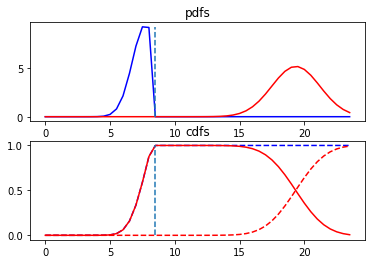

In [795]:
plot_model_tn_th(optimal_params_weekdaytn.x[0],optimal_params_weekdaytn.x[1],optimal_params_weekdaytn.x[2],
              optimal_params_weekdaytn.x[3],optimal_params_weekdaytn.x[4])

In [796]:
weekday_math_params = optimal_params_weekdaytn.x
weekday_math_params

array([0.32232653, 0.04189012, 0.80605567, 0.07735404, 0.68893075])

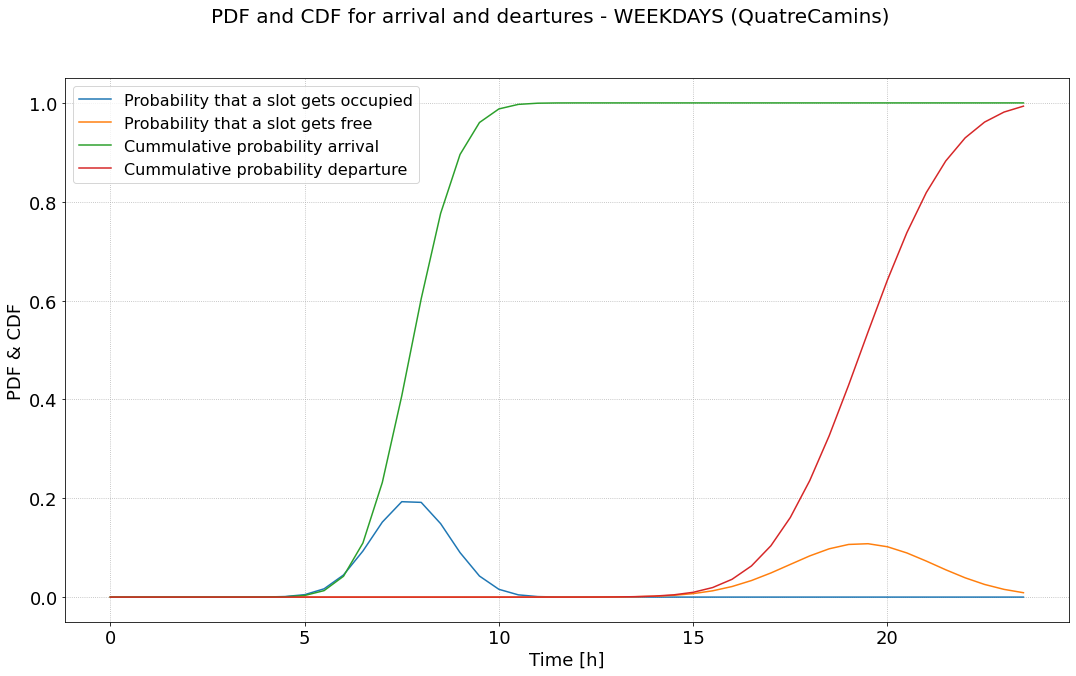

In [797]:
time2 = np.linspace(0,23.5,48)
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#tn1_wd = gam(time2, optimal_params_weekday.x[0], optimal_params_weekday.x[1])
#tn2_wd = gam(time2, optimal_params_weekday.x[2], optimal_params_weekday.x[3])

#cdf1_wd_ap = generate_cdf(tn1_wd)
#cdf2_wd_ap = generate_cdf(tn2_wd)
cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");


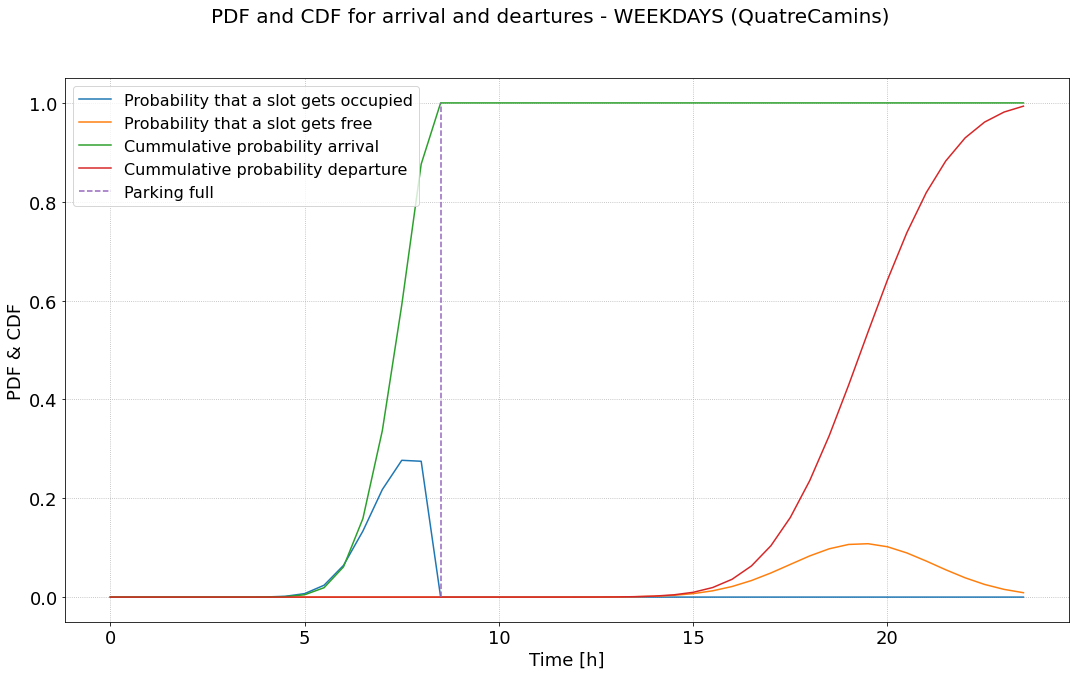

In [798]:
time2 = np.linspace(0,23.5,48)
tn1_wd=tn(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])
tn2_wd=tn(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])

cdf1_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[0], optimal_params_weekdaytn.x[1])

ix_parking_full= np.argmax(cdf1_wd>optimal_params_weekdaytn.x[4])
tn1_wd[cdf1_wd>optimal_params_weekdaytn.x[4]] =0
cdf1_wd[cdf1_wd>optimal_params_weekdaytn.x[4]] = optimal_params_weekdaytn.x[4]
cdf1_wd = cdf1_wd/optimal_params_weekdaytn.x[4]

cdf2_wd = tn_cdf(time_tn, optimal_params_weekdaytn.x[2], optimal_params_weekdaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_wd = np.array(cdf1_wd) - np.array(cdf2_wd)
prototype_math_weekday = resta_wd/sum(resta_wd)

#resta_wd_ap= np.array(cdf1_wd_ap) - np.array(cdf2_wd_ap)
#prototype_math_weekday_ap = resta_wd_ap/sum(resta_wd_ap)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for arrival and deartures - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, tn1_wd/sum(tn1_wd), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_wd/sum(tn2_wd),  label="Probability that a slot gets free")
plt.plot(time2, cdf1_wd, label="Cummulative probability arrival")
plt.plot(time2, cdf2_wd, label="Cummulative probability departure")
plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--',label="Parking full")
#plt.plot(time2, cdf1_wd_ap, label="Cummulative probability arrival approx")
#plt.plot(time2, cdf2_wd_ap, label="Cummulative probability departure approx")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");

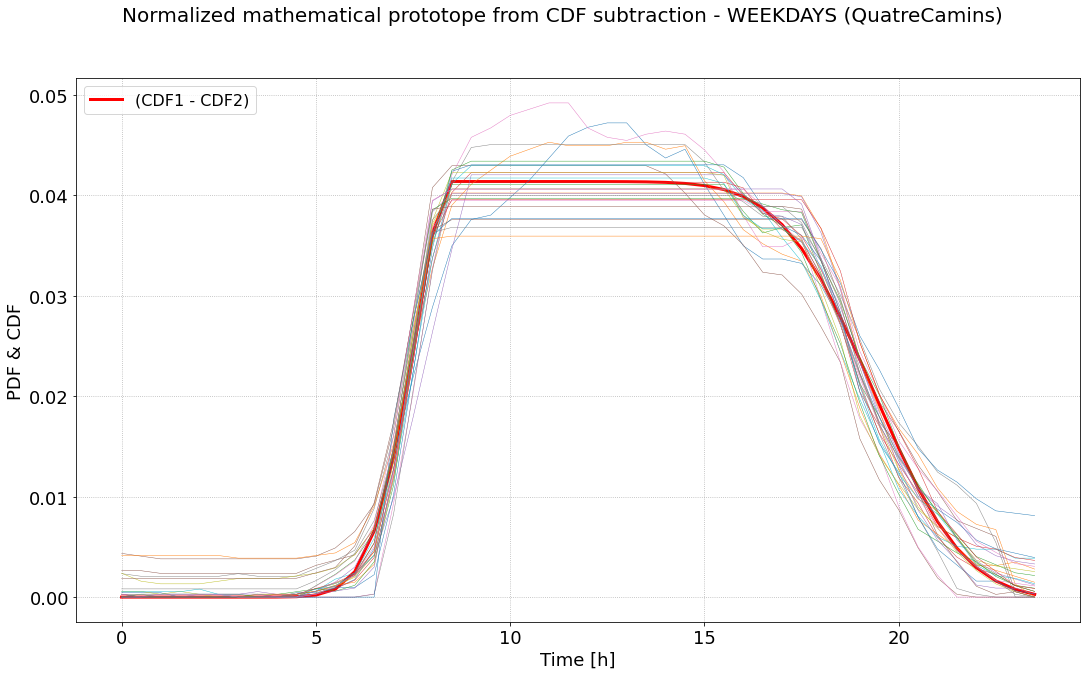

In [799]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - WEEKDAYS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time2, prototype_math_weekday, linewidth=3, color='red', label="(CDF1 - CDF2)")
#plt.plot(time2, prototype_math_weekday_ap, linewidth=3, color='red', label="approx")
for i in range(0,len(training_weekdays_norm)):
    plt.plot(time, training_weekdays_norm[i], linewidth=0.45)

plt.legend(fontsize=16, loc="upper left");

### FRIDAYS

In [800]:
def model_fridays_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    error = 0
    # make tn for arrivals
    arrival_cdf = tn_cdf(time_tn, loc_ar, scale_ar)
    # make tn for departures
    departure_cdf = tn_cdf(time_tn, loc_de, scale_de)
    # compute CDF for arrivals
    #arrival_cdf = generate_cdf(arrival_pdf)
    # compute CDF for departures
    #departure_cdf = generate_cdf(departure_pdf)
    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    res =arrival_cdf - departure_cdf
    res_n = res/sum(res)
    
    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error

def model_fridays_tn_th(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    thresh=params[4]

    cdf_ar=tn_cdf(time_tn, loc_ar, scale_ar)
    cdf_de=tn_cdf(time_tn, loc_de, scale_de)

    cdf_ar[cdf_ar>thresh] = thresh
    cdf_ar = cdf_ar/thresh

    res = cdf_ar - cdf_de
    res_n = res/sum(res)
  
    error = 0  
    for ii in range(0,f_length):
        day = training_fridays_norm[ii]
        error += mean_squared_error(res_n, day)
    return error

# params order = a1, b1, a2, b2
#parameters = np.array([ 2 , 20, 5, 80, 0.02])
#optimal_params_friday = minimize(model_fridays, parameters, method='Nelder-Mead', tol=0.01)

# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
#parameters_tn = np.array([.3 ,.05,.8,.1])
#optimal_params_fridaytn = minimize(model_fridays_tn, parameters_tn, method='Nelder-Mead', tol=0.01)

#parameters_tn = np.array([.2 ,.05,.7,.1])
#optimal_params_fridaytn = minimize(model_fridays_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})
parameters_tn_th = np.array([.2 ,.05,.7,.1,1])
optimal_params_fridaytn = minimize(model_fridays_tn_th, parameters_tn_th, method='Nelder-Mead',
                                    tol=1e-6, options={'disp': True})

Optimization terminated successfully.
         Current function value: 0.000047
         Iterations: 315
         Function evaluations: 510


In [801]:
optimal_params_fridaytn

 final_simplex: (array([[0.31588585, 0.03769162, 0.76517808, 0.1196783 , 0.83883674],
       [0.31588585, 0.03769162, 0.76517808, 0.1196783 , 0.83883696],
       [0.31588583, 0.0376916 , 0.76517809, 0.11967833, 0.83883722],
       [0.31588581, 0.03769159, 0.76517806, 0.11967827, 0.83883744],
       [0.31588592, 0.03769167, 0.76517808, 0.11967829, 0.8388358 ],
       [0.31588592, 0.03769164, 0.76517808, 0.1196783 , 0.83883583]]), array([4.67369271e-05, 4.67369271e-05, 4.67369271e-05, 4.67369271e-05,
       4.67369271e-05, 4.67369271e-05]))
           fun: 4.6736927093066475e-05
       message: 'Optimization terminated successfully.'
          nfev: 510
           nit: 315
        status: 0
       success: True
             x: array([0.31588585, 0.03769162, 0.76517808, 0.1196783 , 0.83883674])

In [802]:
#optimal_params_friday.x
#friday_math_params = optimal_params_friday.x
friday_math_params = optimal_params_fridaytn.x

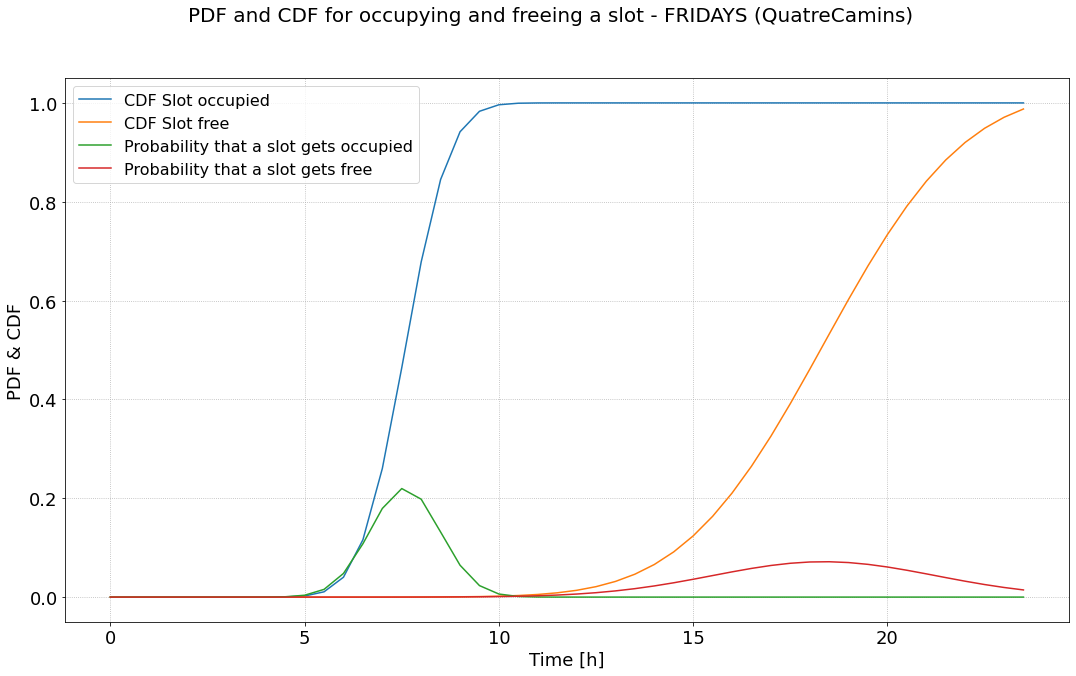

In [803]:

#tn1_fri = gam(time, optimal_params_friday.x[0], optimal_params_friday.x[1])
#tn2_fri = gam(time, optimal_params_friday.x[2], optimal_params_friday.x[3])
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
#cdf1_fri = generate_cdf(tn1_fri)
#cdf2_fri = generate_cdf(tn2_fri)
cdf1_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
cdf2_fri=tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

resta = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta/sum(resta)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_fri, label="CDF Slot occupied")
plt.plot(time, cdf2_fri, label="CDF Slot free")
plt.plot(time, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16)

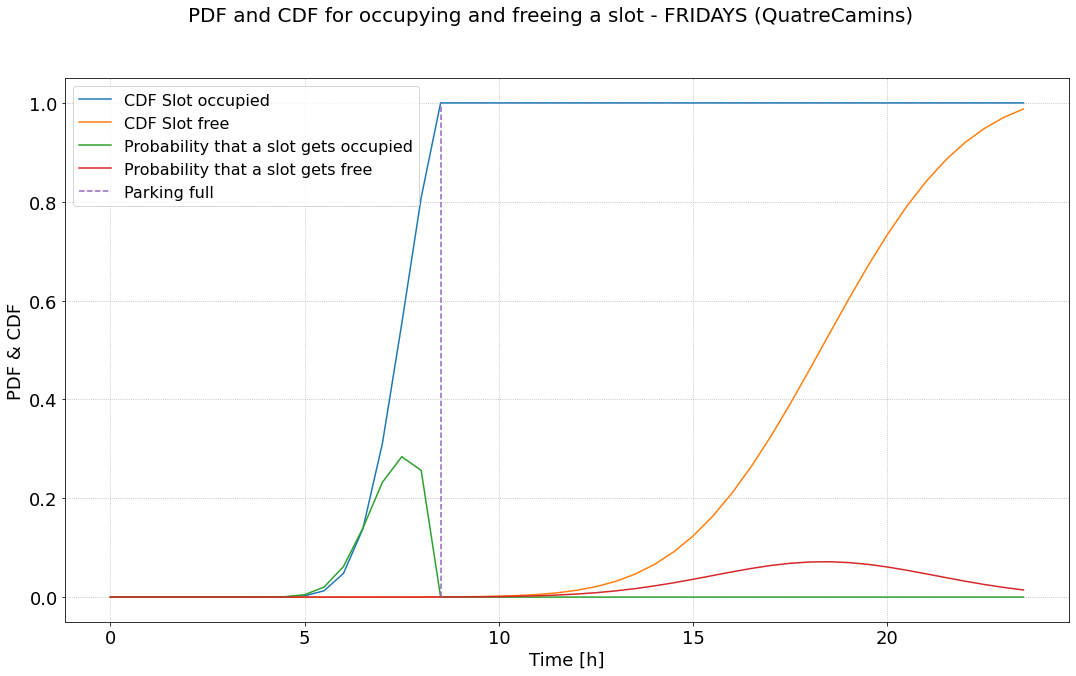

In [833]:
time2 = np.linspace(0,23.5,48)
tn1_fri=tn(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])
tn2_fri=tn(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])

cdf1_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[0], optimal_params_fridaytn.x[1])

ix_parking_full= np.argmax(cdf1_fri>optimal_params_fridaytn.x[4])
tn1_fri[cdf1_fri>optimal_params_fridaytn.x[4]] =0
cdf1_fri[cdf1_fri>optimal_params_fridaytn.x[4]] = optimal_params_fridaytn.x[4]
cdf1_fri = cdf1_fri/optimal_params_fridaytn.x[4]

cdf2_fri = tn_cdf(time_tn, optimal_params_fridaytn.x[2], optimal_params_fridaytn.x[3])
#cdf1_wd = generate_cdf(tn1_wd)
#cdf2_wd = generate_cdf(tn2_wd)

resta_fri = np.array(cdf1_fri) - np.array(cdf2_fri)
prototype_math_friday = resta_fri/sum(resta)

fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - FRIDAYS ("+current_parking+")", fontsize=20)
plt.plot(time2, cdf1_fri, label="CDF Slot occupied")
plt.plot(time2, cdf2_fri, label="CDF Slot free")
plt.plot(time2, tn1_fri/sum(tn1_fri), label="Probability that a slot gets occupied")
plt.plot(time2, tn2_fri/sum(tn2_fri),  label="Probability that a slot gets free")
plt.plot(0.5*ix_parking_full*np.array([1, 1]),[0,1],'--',label="Parking full")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left");

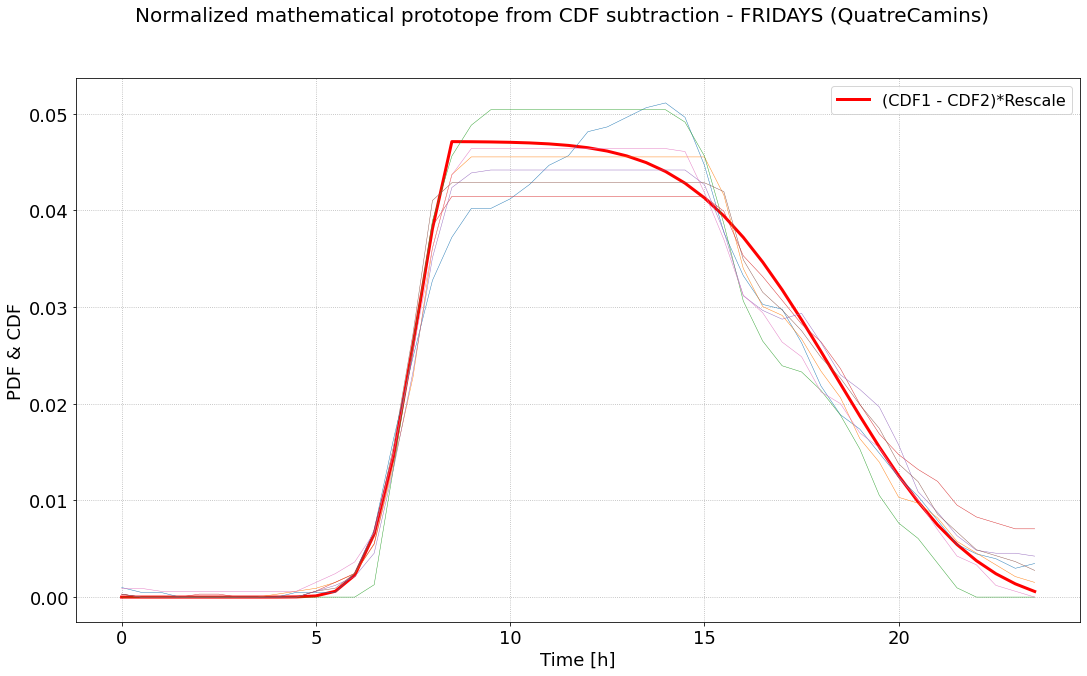

In [834]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - FRIDAYS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time, prototype_math_friday, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
for i in range(0,len(training_fridays_norm)):
    plt.plot(time, training_fridays_norm[i], linewidth=0.45)
plt.legend(fontsize=16);

### WEEKENDS

In [835]:
training_weekends_norm  = get_days_of_protos_normalized("Weekend", df_training)
training_weekends_norm = training_weekends_norm[:-1]
t = []
for i in range(0,len(training_weekends_norm)):
    if training_weekends_norm[i].mean() != 0:
        t.append(training_weekends_norm[i])
        
training_weekends_norm = t
we_length = len(t)

def model_weekends_tn(params): 
    loc_ar = params[0]
    scale_ar = params[1]
    loc_de = params[2]
    scale_de = params[3]
    error = 0
    # make tn for arribals
    #arrival_pdf = tn(time_tn, loc_ar, scale_ar)
    # make tn for departures
    #departure_pdf = tn(time_tn, loc_de, scale_de)
    # compute CDF for arribals
    #arrival_cdf = generate_cdf(arrival_pdf)
    # compute CDF for departures
    #departure_cdf = generate_cdf(departure_pdf)
    
    arrival_cdf = tn_cdf(time_tn, loc_ar, scale_ar)
    departure_cdf = tn_cdf(time_tn, loc_de, scale_de)
    res =arrival_cdf - departure_cdf
    
    #res = np.array(arrival_cdf) - np.array(departure_cdf)
    res_n = res/sum(res)
    
    #print(loc_de)
    #print(scale_de)
    #print(departure_cdf)
    
    for ii in range(0,we_length):
        day = training_weekends_norm[ii]
        error += mean_squared_error(res_n, day)
        
        
        
    #plot_model_tn_pres(loc_ar, scale_ar, loc_de, scale_de) 
    #print("mua = " + str(loc_ar) + "\tstda  = " + str(scale_ar))
    #print("mus = " + str(loc_de) + "\tstds = " + str(scale_de))
    #print("Err = " + str(error))     

    return error


# params order = a1, b1, a2, b2
#parameters = np.array([ 2 , 20, 5, 80, 2])
#optimal_params_weekend = minimize(model_weekends, parameters, method='Nelder-Mead', tol=0.01)

# params order: loc_ar=.3, scale_ar=.05, loc_de=.8, scale_de=.1, rescale
parameters_tn = np.array([.3 ,.1,.8,0.5])
#optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead', tol=0.01)
#optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead',
#                                    tol=1e-6, options={'disp': True})
if ((current_parking == "SantBoi") or (current_parking == "Cerdanyola")): 
    optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='SLSQP',
                                        bounds=((0, None), (0, None),(0, None),(0, None)),
                                        tol=1e-6, options={'disp': True})
else:
    optimal_params_weekendtn = minimize(model_weekends_tn, parameters_tn, method='Nelder-Mead',
                                        tol=1e-6, options={'disp': True})  

Optimization terminated successfully.
         Current function value: 0.000570
         Iterations: 276
         Function evaluations: 465


In [836]:
#weekend_math_params = optimal_params_weekend.x
#optimal_params_weekend.x
weekend_math_params = optimal_params_weekendtn.x
optimal_params_weekendtn.x

array([0.39530181, 0.08861598, 0.95355659, 0.10502769])

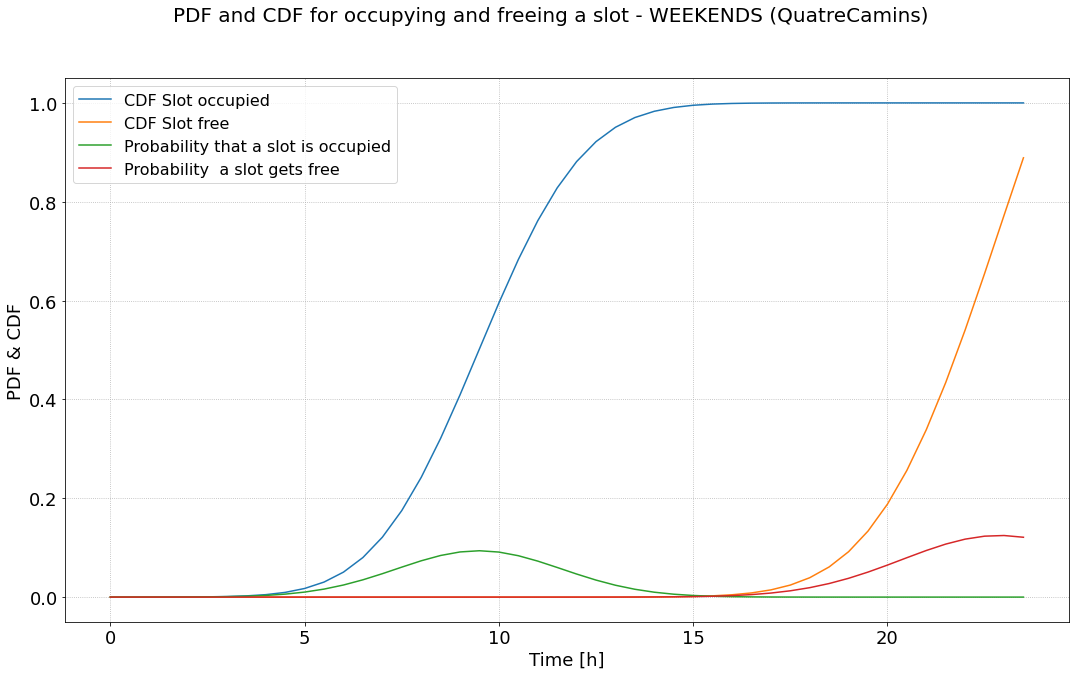

In [837]:
#tn1_we = gam(time, optimal_params_weekend.x[0], optimal_params_weekend.x[1])
#tn2_we = gam(time, optimal_params_weekend.x[2], optimal_params_weekend.x[3])
tn1_we=tn(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
tn2_we=tn(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



#cdf1_we = generate_cdf(tn1_we)
#cdf2_we = generate_cdf(tn2_we)
cdf1_we = tn_cdf(time_tn, optimal_params_weekendtn.x[0], optimal_params_weekendtn.x[1])
cdf2_we = tn_cdf(time_tn, optimal_params_weekendtn.x[2], optimal_params_weekendtn.x[3])



resta_we = np.array(cdf1_we) - np.array(cdf2_we)
prototype_math_weekend = resta_we/sum(resta_we)
fig = plt.figure(figsize=(18,10))
fig.suptitle("PDF and CDF for occupying and freeing a slot - WEEKENDS ("+current_parking+")", fontsize=20)
plt.plot(time, cdf1_we, label="CDF Slot occupied")
plt.plot(time, cdf2_we, label="CDF Slot free")
plt.plot(time, tn1_we/sum(tn1_we), label="Probability that a slot is occupied")
plt.plot(time, tn2_we/sum(tn2_we),  label="Probability  a slot gets free")
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.legend(fontsize=16, loc="upper left")

plt.legend(fontsize=16);

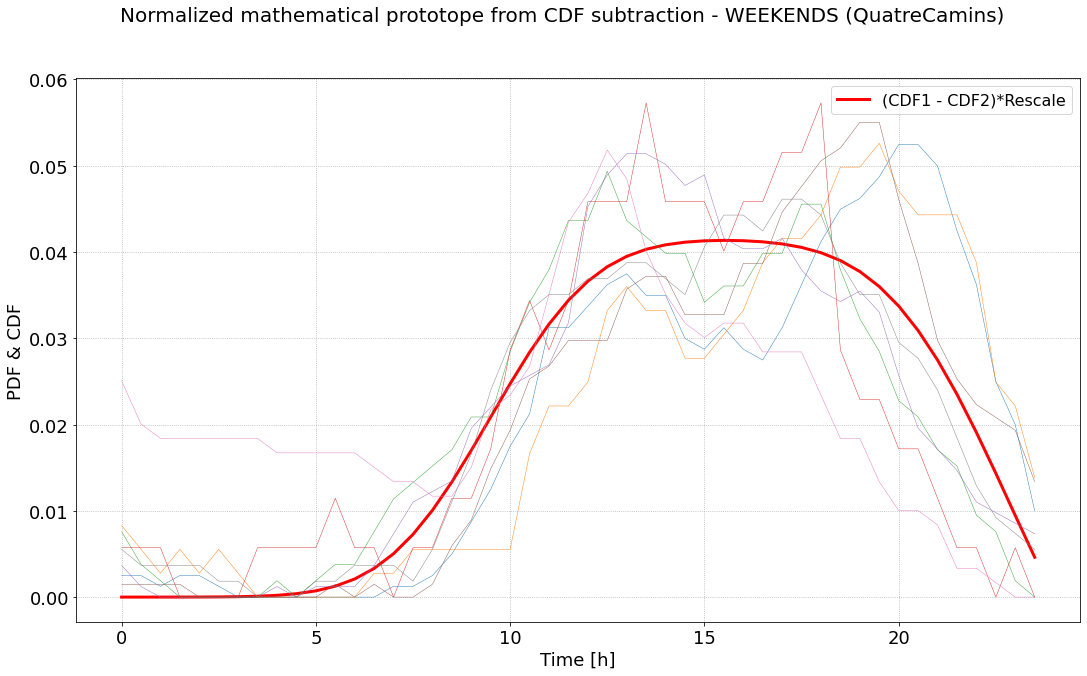

In [838]:
fig = plt.figure(figsize=(18,10))
fig.suptitle("Normalized mathematical prototope from CDF subtraction - WEEKENDS ("+current_parking+")", fontsize=20)
plt.grid(linestyle='dotted')
plt.xlabel("Time [h]", fontsize=18)
plt.ylabel("PDF & CDF", fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.plot(time, prototype_math_weekend, linewidth=3, color='red', label="(CDF1 - CDF2)*Rescale")
for i in range(0,len(training_weekends_norm)):
    plt.plot(time, training_weekends_norm[i], linewidth=0.45)
plt.legend(fontsize=16)

In [839]:
tn_weekday_n = prototype_math_weekday
tn_friday_n = prototype_math_friday
tn1_weekend_n = prototype_math_weekend

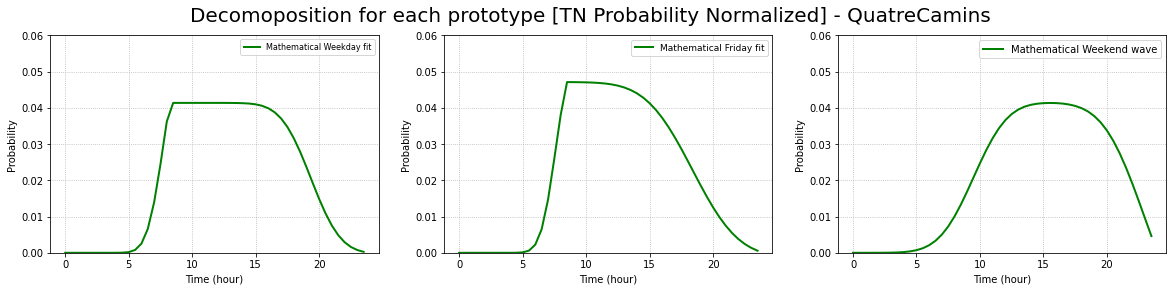

In [840]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time2, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,0.06])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time2, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,0.06])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time2, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,0.06])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

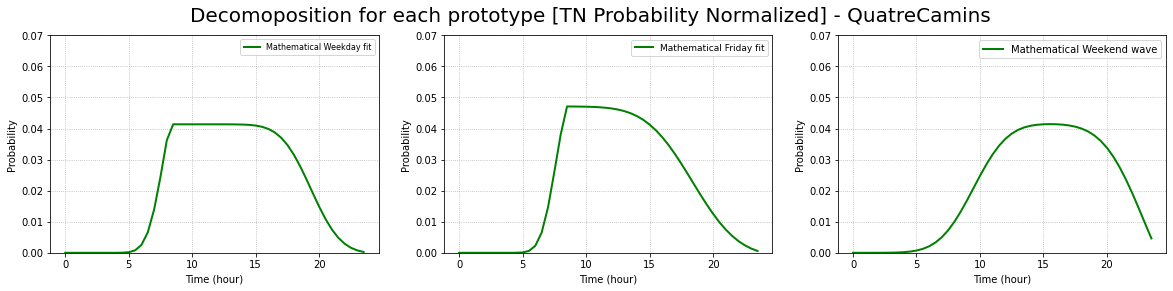

In [841]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Normalized] - ' + current_parking, fontsize=20)

# for ii in range(len(training_weekdays_norm)):
#     ax[0].plot(time,training_weekdays_norm[ii], linewidth='0.5')
ax[0].plot(time, tn_weekday_n, linewidth=2, color= 'green', label='Mathematical Weekday fit')
ax[0].set_ylim([0,0.07])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays_norm)):
#     ax[1].plot(time,training_fridays_norm[ii], linewidth='0.5')
ax[1].plot(time, tn_friday_n, linewidth=2, color= 'green', label='Mathematical Friday fit')
ax[1].set_ylim([0,0.07])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# CHECK THIS
Area = integrate.simps(tn1_weekend_n) 
tn1_weekend_n = tn1_weekend_n/Area

# for ii in range(len(training_weekends_norm)):
#      ax[2].plot(time,training_weekends_norm[ii], linewidth='0.5')
ax[2].plot(time, tn1_weekend_n, linewidth=2, color='green', label='Mathematical Weekend wave')
ax[2].set_ylim([0,0.07])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');

In [842]:
#**************************************WEEKDAY************************************
tn_weekday = tn_weekday_n*weekday_area + weekday_offset

#**************************************FRIDAY************************************
tn_friday = tn_friday_n*friday_area + friday_offset

#**************************************WEEKEND************************************
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 

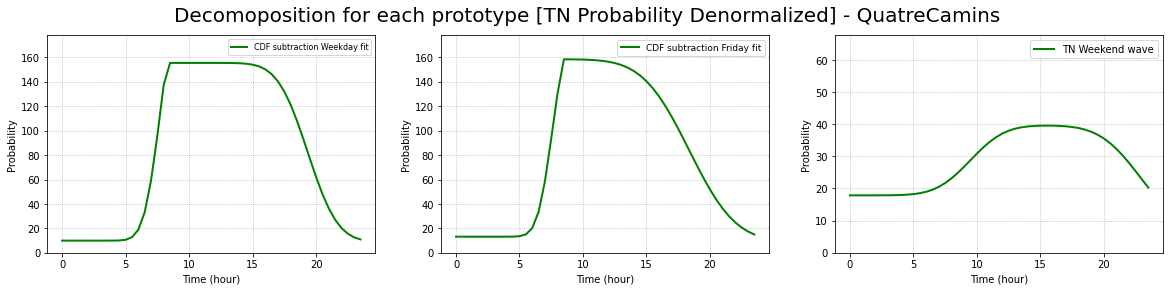

In [843]:
fig, ax = plt.subplots(1,3)
fig.set_figwidth(20)
fig.set_figheight(4)
fig.suptitle('Decomoposition for each prototype [TN Probability Denormalized] - ' + current_parking , fontsize=20)

# for ii in range(len(training_weekdays)):
#     ax[0].plot(time,training_weekdays[ii], linewidth='0.5')
ax[0].plot(time, tn_weekday, linewidth=2, color= 'green', label='CDF subtraction Weekday fit')
ax[0].set_ylim([0,axis_ylim])
ax[0].grid(linestyle='dotted')
ax[0].legend(fontsize=8)
ax[0].set_xlabel('Time (hour)')
ax[0].set_ylabel('Probability')

# for ii in range(len(training_fridays)):
#     ax[1].plot(time,training_fridays[ii], linewidth='0.5')
ax[1].plot(time, tn_friday, linewidth=2, color= 'green', label='CDF subtraction Friday fit')
ax[1].set_ylim([0,axis_ylim])
ax[1].grid(linestyle='dotted')
ax[1].legend(fontsize=9)
ax[1].set_xlabel('Time (hour)')
ax[1].set_ylabel('Probability')

# for ii in range(len(training_weekends)):
#     ax[2].plot(time,training_weekends[ii], linewidth='0.5')
ax[2].plot(time, tn1_weekend, linewidth=2, color='green', label='TN Weekend wave')
ax[2].set_ylim([0,axis_ylim_we])
ax[2].grid(linestyle='dotted')
ax[2].legend()
ax[2].set_xlabel('Time (hour)')
ax[2].set_ylabel('Probability');
# ax[2].set_yticks([0,0.005,0.01])
# ax[2].set_yticks(["0","0.05","0.1"])

### Comparing normalized mathematical fitted prototype with testing data

In [844]:
def subplot_training(fig, ax, xx, yy, proto_data, test_days, day, proto_name): 
    ax[xx,yy].plot(time, proto_data, linewidth=3, linestyle='dashed', label= proto_name + ' TN prediction')
    for i in range(0, len(test_days)): 
        ax[xx, yy].plot(time, test_days[i], linewidth=1, label='Testing ' + day )
        if i==0:
            ax[xx,yy].legend(fontsize=16)
    ax[xx,yy].grid(linestyle='dotted')
    ax[xx,yy].set_ylim(-2,axis_ylim)
    ax[xx,yy].set_xlabel('Time (hours)', fontsize=16)
    ax[xx,yy].set_ylabel('Occupancy', fontsize=16)


### Denormalization / Rescaling

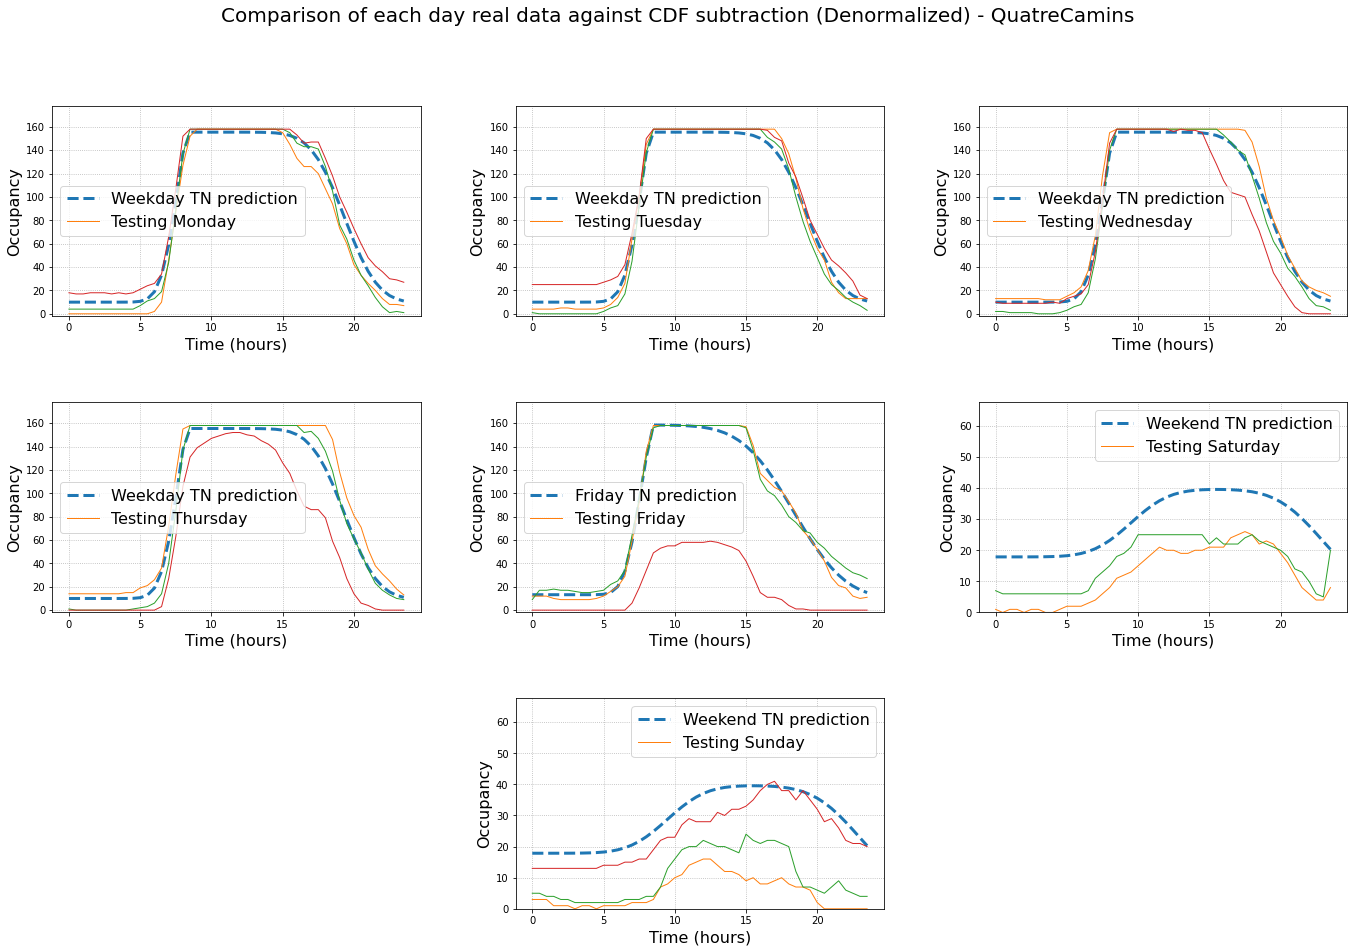

In [845]:
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(14)
fig.suptitle('Comparison of each day real data against CDF subtraction (Denormalized) - ' + current_parking, fontsize=20)

tn_weekday = tn_weekday_n*weekday_area + weekday_offset
tn_friday = tn_friday_n*friday_area + friday_offset
tn1_weekend = tn1_weekend_n*weekend_area + weekend_offset 

subplot_training(fig, ax, 0, 0, tn_weekday, testing_mondays, 'Monday', 'Weekday')
subplot_training(fig, ax, 0, 1, tn_weekday, testing_tuesdays, 'Tuesday', 'Weekday')
subplot_training(fig, ax, 0, 2, tn_weekday, testing_wednesdays, 'Wednesday', 'Weekday')
subplot_training(fig, ax, 1, 0, tn_weekday, testing_thursdays, 'Thursday', 'Weekday')
subplot_training(fig, ax, 1, 1, tn_friday, testing_fridays, 'Friday', 'Friday')
subplot_training(fig, ax, 1, 2, tn1_weekend, testing_saturdays, 'Saturday', 'Weekend')
subplot_training(fig, ax, 2, 1, tn1_weekend, testing_sundays, 'Sunday', 'Weekend')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
ax[2,1].set_ylim(0,axis_ylim_we)
ax[1,2].set_ylim(0,axis_ylim_we)
fig.tight_layout(pad=5.0)

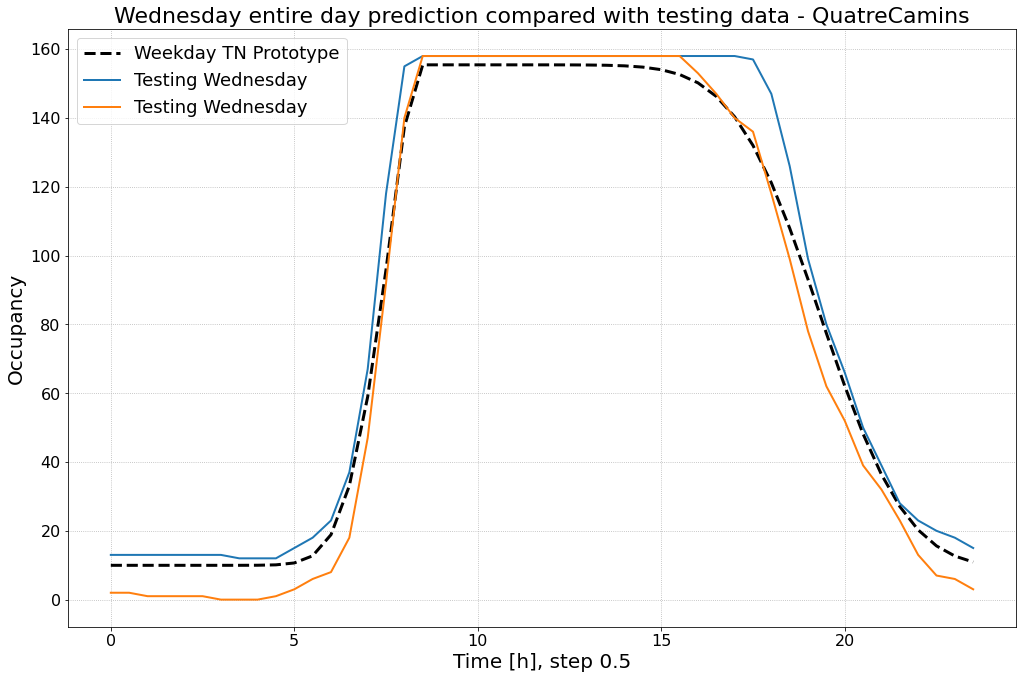

In [846]:
fig = plt.figure(figsize=(17,11))
plt.title('Wednesday entire day prediction compared with testing data - '+current_parking, fontsize = 22)
plt.plot(time, tn_weekday, linestyle='dashed', linewidth=3, color='black', label='Weekday TN Prototype')
plt.plot(time, testing_wednesdays[0], linewidth=2, label="Testing Wednesday")
plt.plot(time, testing_wednesdays[1], linewidth=2, label="Testing Wednesday")
# plt.plot(time, testing_wednesdays[3], linewidth=2, label="Testing Wednesday")
plt.grid(linestyle='dotted')
plt.legend(fontsize=18)
plt.xlabel('Time [h], step 0.5', fontsize=20)
plt.ylabel('Occupancy', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16);

______MEAN________
4.892789468022383
4.53180601914718
5.1535885589114345
8.002217268515727
14.759806089117413
9.443734622781347
9.865922129444698
______STDV________
2.4239781454522746
2.152433890872653
3.922821675618628
5.234243731551689
8.428456384483306
1.681775903732847
1.9258292369576242


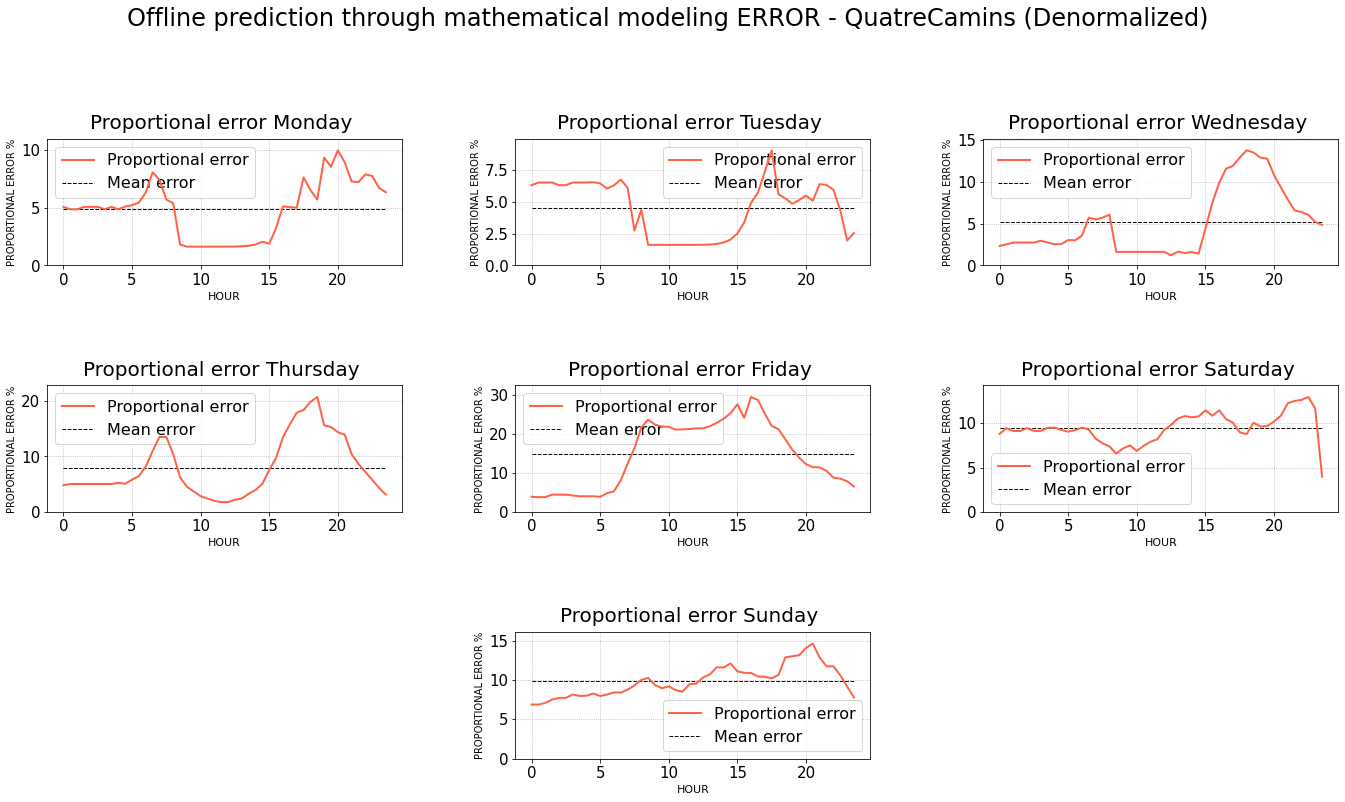

In [847]:
def compute_testing_prop_error(testing_days, proto_data):
    errors = np.zeros(48)
    n_test_days = len(testing_days)
    proto = np.array(proto_data)
    
    for i in range(0, n_test_days):
        day = np.array(testing_days[i])
        er = np.array((np.absolute(proto - day)/max_value)*100)
        errors += er
    return errors/n_test_days

error_monday_tn = compute_testing_prop_error(testing_mondays, tn_weekday)
error_tuesday_tn = compute_testing_prop_error(testing_tuesdays, tn_weekday)
error_wednesday_tn = compute_testing_prop_error(testing_wednesdays, tn_weekday)
error_thursday_tn = compute_testing_prop_error(testing_thursdays, tn_weekday)
error_friday_tn = compute_testing_prop_error(testing_fridays, tn_friday)
error_saturday_tn = compute_testing_prop_error(testing_saturdays, tn1_weekend)
error_sunday_tn = compute_testing_prop_error(testing_sundays, tn1_weekend)

def subplotCDFsubtractionErr(fig, ax, axx, axy, x, error, mean, title, day ):
    ax[axx,axy].plot(x, error, color="tomato", linewidth=2, zorder=10, label='Proportional error')
    ax[axx,axy].plot(x, mean, linewidth=1, linestyle='--' ,color='black', label='Mean error')
    ax[axx,axy].grid(linestyle='dotted')
    ax[axx,axy].set_ylabel('Proportional error %', fontsize=20)
    ax[axx,axy].set_xlabel('Hours', fontsize=20)
    ax[axx,axy].set_title(title , fontsize=20, pad=10)
    ax[axx,axy].set_ylim((0,1.1*max(error)))
    ax[axx,axy].legend(fontsize=16)
    ax[axx,axy].tick_params( labelsize=15)

    
fig, ax = plt.subplots(3, 3)
fig.set_figwidth(20)
fig.set_figheight(12)
fig.suptitle('Offline prediction through mathematical modeling ERROR - '+current_parking+' (Denormalized)', fontsize=24)
time = np.linspace(0,23.5,48)

mean_Monday =  [np.mean(error_monday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 0, time, error_monday_tn, mean_Monday, 
                 'Proportional error Monday ', 'Monday')

mean_Tuesday =  [np.mean(error_tuesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 1, time, error_tuesday_tn, mean_Tuesday, 
                 'Proportional error Tuesday ', 'Tuesday')

mean_Wednesday =  [np.mean(error_wednesday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 0, 2, time, error_wednesday_tn, mean_Wednesday, 
                 'Proportional error Wednesday ', 'Wednesday')

mean_Thursday =  [np.mean(error_thursday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 0, time, error_thursday_tn, mean_Thursday, 
                 'Proportional error Thursday ', 'Thursday')

mean_Friday =  [np.mean(error_friday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 1, time, error_friday_tn, mean_Friday, 
                 'Proportional error Friday ', 'Friday')

mean_Saturday =  [np.mean(error_saturday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 1, 2, time, error_saturday_tn, mean_Saturday, 
                 'Proportional error Saturday ', 'Saturday')

mean_Sunday =  [np.mean(error_sunday_tn)]*len(time)
subplotCDFsubtractionErr(fig, ax, 2, 1, time, error_sunday_tn, mean_Sunday, 
                 'Proportional error Sunday ', 'Sunday')

ax[2,0].set_visible(False)
ax[2,2].set_visible(False)
fig.tight_layout(pad=5.0)
for ax in ax.flat:
    ax.set_ylabel('PROPORTIONAL ERROR %', fontsize=10)
    ax.set_xlabel('HOUR', fontsize=11)


print('______MEAN________')    

print(mean_Monday[0])
print(mean_Tuesday[0])
print(mean_Wednesday[0])
print(mean_Thursday[0])
print(mean_Friday[0])
print(mean_Saturday[0])
print(mean_Sunday[0])

print('______STDV________')

print(np.std(error_monday_tn))
print(np.std(error_tuesday_tn))
print(np.std(error_wednesday_tn))
print(np.std(error_thursday_tn))
print(np.std(error_friday_tn))
print(np.std(error_saturday_tn))
print(np.std(error_sunday_tn))


### MATHEMATICAL PROTOTYE: Real time prediction by SCALING

In [848]:
# Plotting methods to reduce cell dimension

def real_timing_predition(fig, ax, axx, day, tn_proto, real_day, scaled_proto, Prototype, limit_hour, t_date):
    fig.suptitle('Real time prediction Scaling mathematical and mean proto for Testing '
                 + day + ' ' +t_date + ' ('+ current_parking+')', fontsize='18')
    ax[axx].plot(time, real_day.values, linestyle='dashdot', linewidth=2, label='Real ' + day)
    ax[axx].plot(time, tn_proto,'--',color='grey', label='TN prototype (not scaled)')
    ax[axx].plot(time, scaled_proto, color='green', linewidth=2, label='TN proto (scaled)')
    ax[axx].plot(time, Prototype, color='orange', linewidth=2, label='Stat. scaled proto')
    ax[axx].axvline(x=limit_hour, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour, facecolor='grey', alpha=0.2, label='Known Activity')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].legend(fontsize=9)
    ax[axx].set_ylim([0,1.1*max([max(real_day.values),max(tn_proto),max(scaled_proto),max(Prototype)])])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Occupancy', fontsize=14)

def errors_plotting(fig, ax, axx, scaled_proto, Prototype, real_day, day, limit_hour):
    #Computing Errors
    limit_hour = limit_hour*2
    tn_scaled_error = (np.absolute((np.array(scaled_proto) - np.array(real_day.values)))/max_value)*100
    mean_scaled_error = (np.absolute((np.array(Prototype) - np.array(real_day.values)))/max_value)*100

    tn_s_error_mean = [np.mean(tn_scaled_error[limit_hour:])]*len(tn_scaled_error)
    mean_s_error_mean = [np.mean(mean_scaled_error[limit_hour:])]*len(mean_scaled_error)

    #Second plot
#     time = time[limit_hour:]
    ax[axx].plot(time[limit_hour:], tn_scaled_error[limit_hour:], color='tomato', label='TN scaling error')
    ax[axx].plot(time[limit_hour:],tn_s_error_mean[limit_hour:], '--',color='tomato', label='TN Mean prop. error')
    ax[axx].plot(time[limit_hour:],mean_scaled_error[limit_hour:], color='blueviolet', label='Proto scaling error')
    ax[axx].plot(time[limit_hour:],mean_s_error_mean[limit_hour:], '--',color='blueviolet', label='Proto. Mean prop. error')
    ax[axx].grid(linestyle='dotted', linewidth='0.5', color='grey')
    ax[axx].axvline(x=limit_hour/2, linestyle='--', color='grey', linewidth=2, label='Moment of prediction')
    ax[axx].axvspan(0, limit_hour/2, facecolor='grey', alpha=0.2, label='Known Activity', zorder=4)
    ax[axx].legend(fontsize=12)
    ax[axx].set_ylim([0,1.1*max(max(tn_scaled_error[limit_hour:]),max(mean_scaled_error[limit_hour:]))])
    ax[axx].set_xlabel('Hour', fontsize=14)
    ax[axx].set_ylabel('Proportional error (%)', fontsize=14)

    print('Real ' + day + ' scaled prtotype error: ', round(100*mean_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled prtotype STDV: ', np.std(mean_scaled_error[limit_hour:]))

    print('Real ' + day + ' scaled TN error: ', round(100*tn_s_error_mean[0])/100, '%')
    print('Real ' + day + ' scaled TN STDV: ', np.std(tn_scaled_error[limit_hour:]))
    print('_____________________________________________________________')

def get_scaling_factor(limit_hour, test_day, proto):
    if limit_hour < 6:
        return 1
    index = limit_hour*2
    current_real_data = test_day.values[index]
    proto_value = proto[index]
    scaling = current_real_data/proto_value
    return scaling

#### MONDAY

2020-02-24
Real Monday scaled prtotype error:  4.52 %
Real Monday scaled prtotype STDV:  2.0633931110407793
Real Monday scaled TN error:  3.07 %
Real Monday scaled TN STDV:  2.2590399823644653
_____________________________________________________________
2020-03-02
Real Monday scaled prtotype error:  6.44 %
Real Monday scaled prtotype STDV:  4.461573479597162
Real Monday scaled TN error:  6.08 %
Real Monday scaled TN STDV:  3.1466497710599985
_____________________________________________________________
2020-03-09
Real Monday scaled prtotype error:  4.12 %
Real Monday scaled prtotype STDV:  2.435573043760277
Real Monday scaled TN error:  6.21 %
Real Monday scaled TN STDV:  2.9670022357663415
_____________________________________________________________


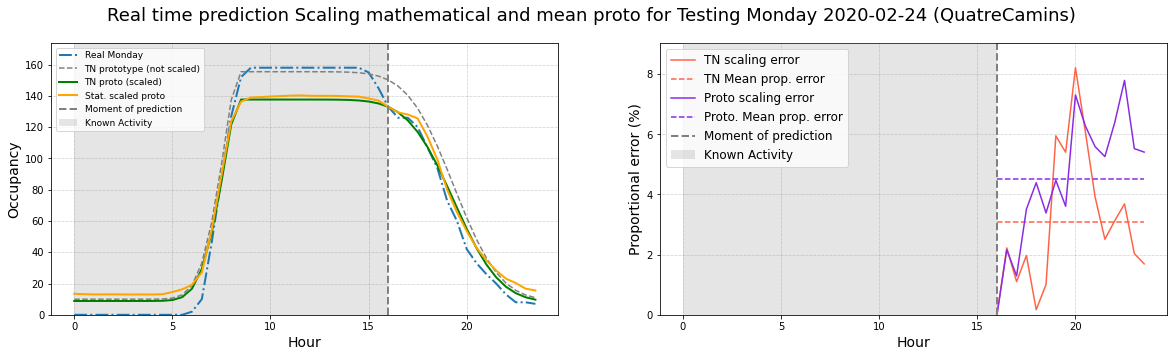

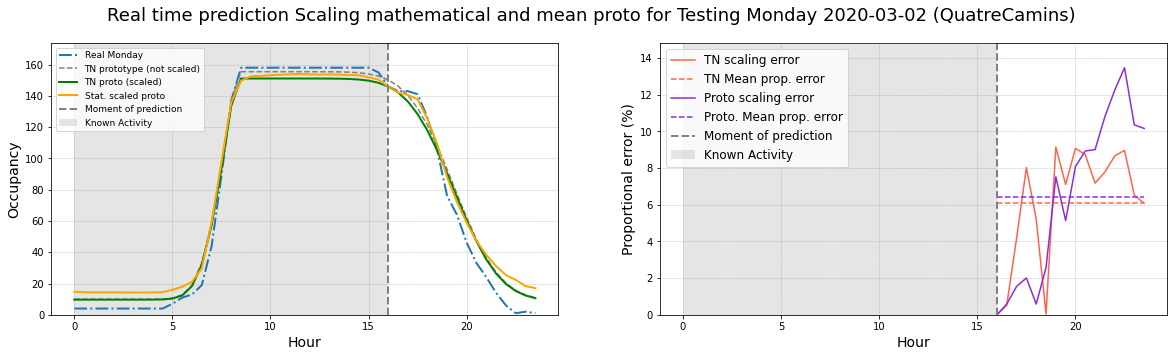

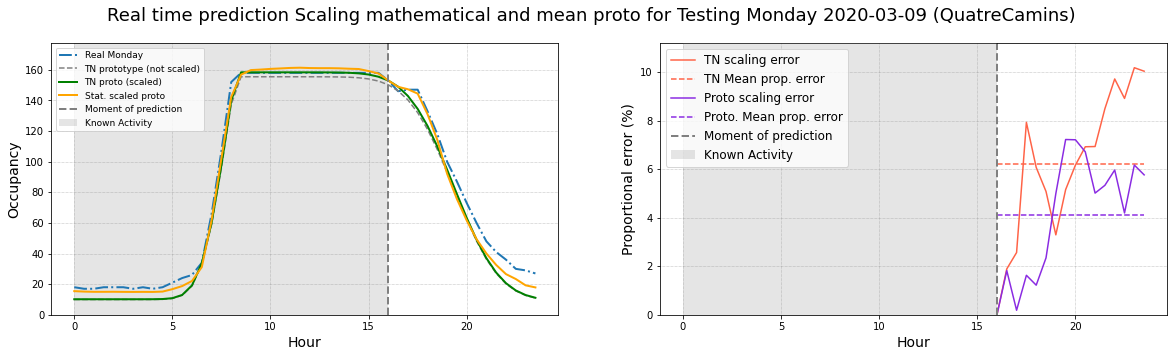

In [849]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_mondays
t_dates=testing_mondays_dates
limit_hour = 16
day = 'Monday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(5)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

#### TUESDAY

2020-02-25
Real Tuesday scaled prtotype error:  2.96 %
Real Tuesday scaled prtotype STDV:  2.976826793856181
Real Tuesday scaled TN error:  2.84 %
Real Tuesday scaled TN STDV:  3.1141551223262884
_____________________________________________________________
2020-03-03
Real Tuesday scaled prtotype error:  3.84 %
Real Tuesday scaled prtotype STDV:  3.641978792823823
Real Tuesday scaled TN error:  3.23 %
Real Tuesday scaled TN STDV:  3.434737644454805
_____________________________________________________________
2020-03-10
Real Tuesday scaled prtotype error:  2.45 %
Real Tuesday scaled prtotype STDV:  2.1406779676353533
Real Tuesday scaled TN error:  2.85 %
Real Tuesday scaled TN STDV:  2.9650050051852475
_____________________________________________________________


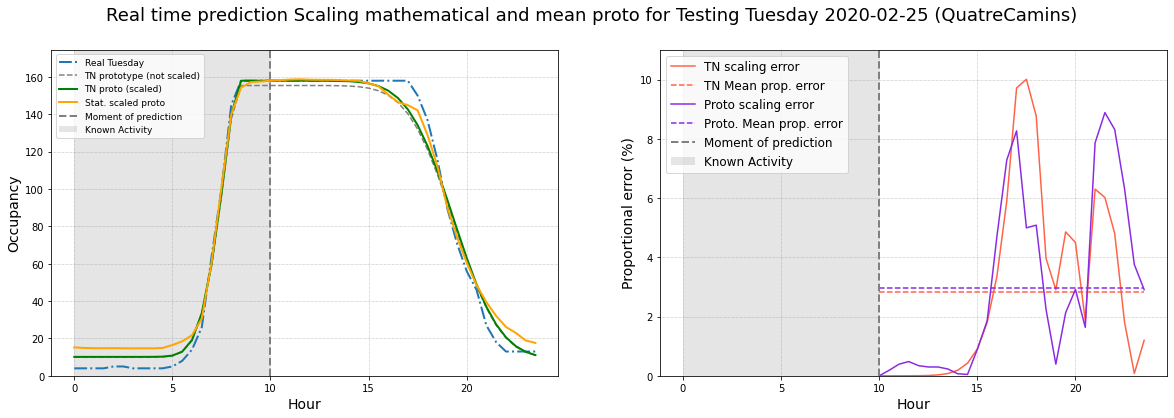

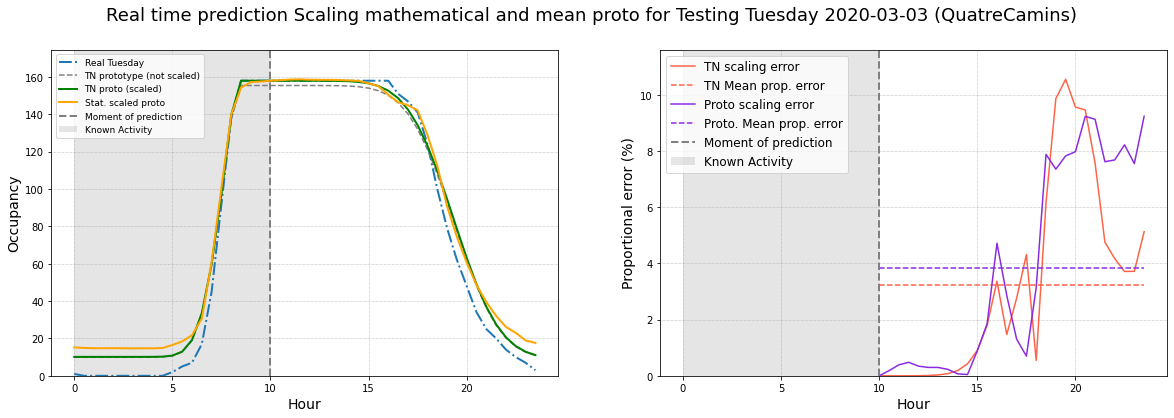

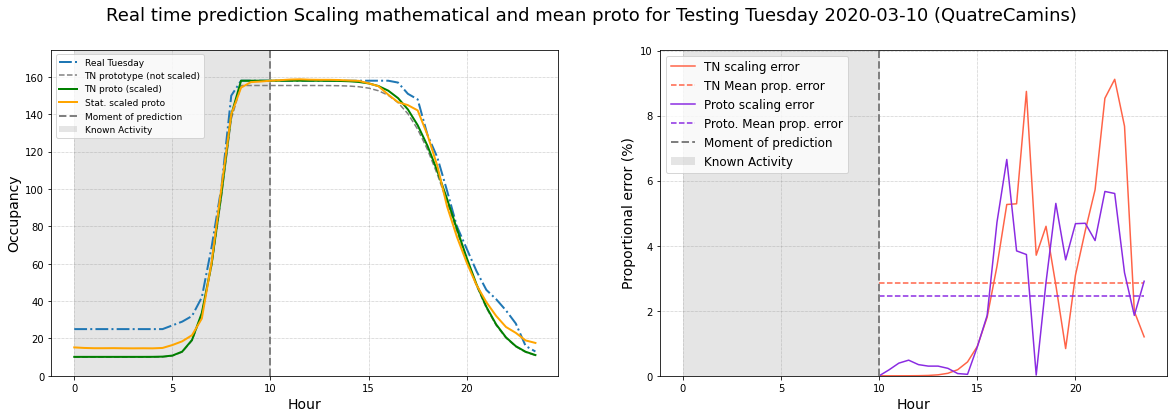

In [850]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_tuesdays
t_dates= testing_tuesdays_dates
limit_hour = 10
day = 'Tuesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### WEDNESDAY

2020-02-26
Real Wednesday scaled prtotype error:  3.53 %
Real Wednesday scaled prtotype STDV:  3.493449536618509
Real Wednesday scaled TN error:  3.61 %
Real Wednesday scaled TN STDV:  4.458624335280736
_____________________________________________________________
2020-03-04
Real Wednesday scaled prtotype error:  4.58 %
Real Wednesday scaled prtotype STDV:  3.3241232963200726
Real Wednesday scaled TN error:  3.54 %
Real Wednesday scaled TN STDV:  3.1721391960957246
_____________________________________________________________
2020-03-11
Real Wednesday scaled prtotype error:  16.91 %
Real Wednesday scaled prtotype STDV:  9.23326089065558
Real Wednesday scaled TN error:  16.04 %
Real Wednesday scaled TN STDV:  9.565642819317405
_____________________________________________________________


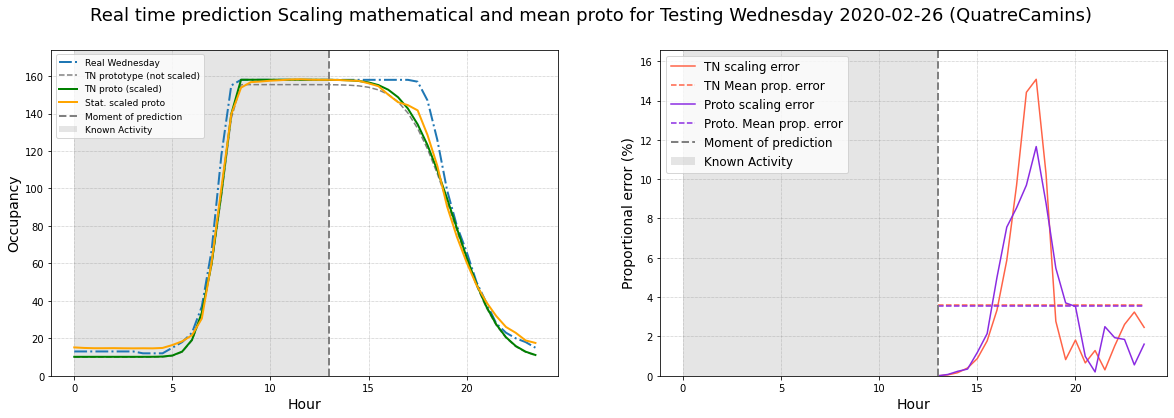

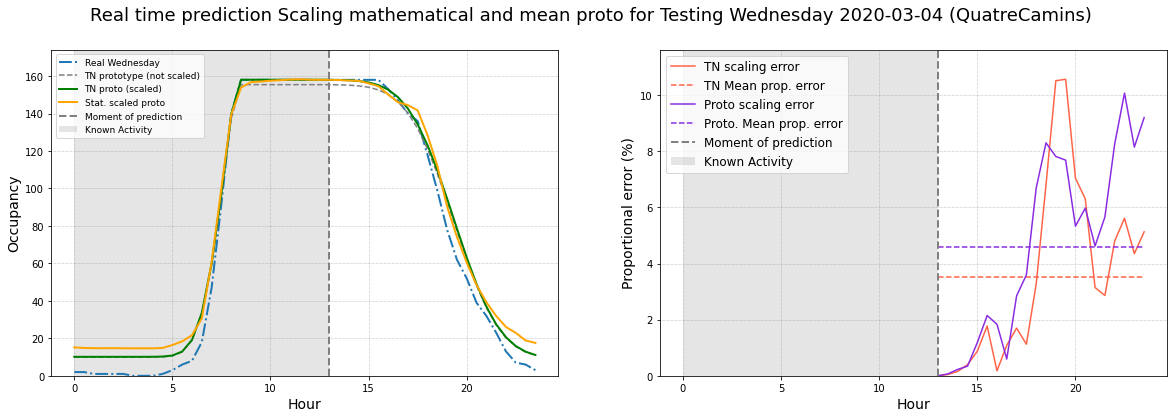

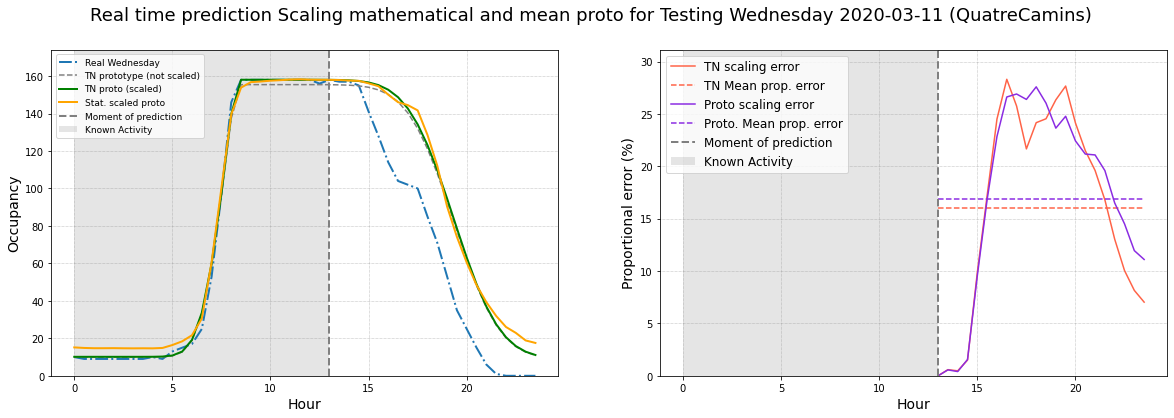

In [851]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_wednesdays
t_dates= testing_wednesdays_dates
limit_hour = 13
day = 'Wednesday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0

cont=0        
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### THURSDAY

2020-02-27
Real Thursday scaled prtotype error:  6.99 %
Real Thursday scaled prtotype STDV:  6.636624129560187
Real Thursday scaled TN error:  7.55 %
Real Thursday scaled TN STDV:  6.781760697885067
_____________________________________________________________
2020-03-05
Real Thursday scaled prtotype error:  2.96 %
Real Thursday scaled prtotype STDV:  2.26015141983242
Real Thursday scaled TN error:  2.42 %
Real Thursday scaled TN STDV:  2.4537203497180546
_____________________________________________________________
2020-03-12
Real Thursday scaled prtotype error:  18.87 %
Real Thursday scaled prtotype STDV:  9.648468606963545
Real Thursday scaled TN error:  18.04 %
Real Thursday scaled TN STDV:  10.19422172792771
_____________________________________________________________


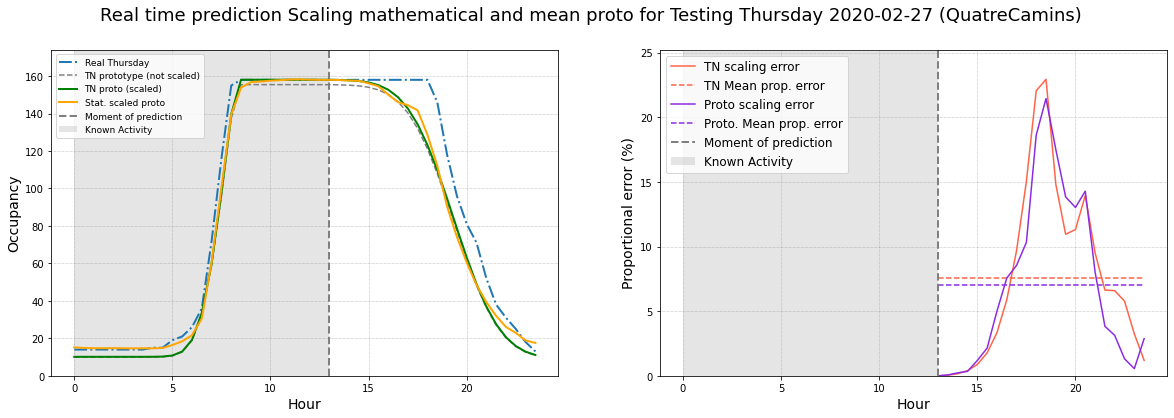

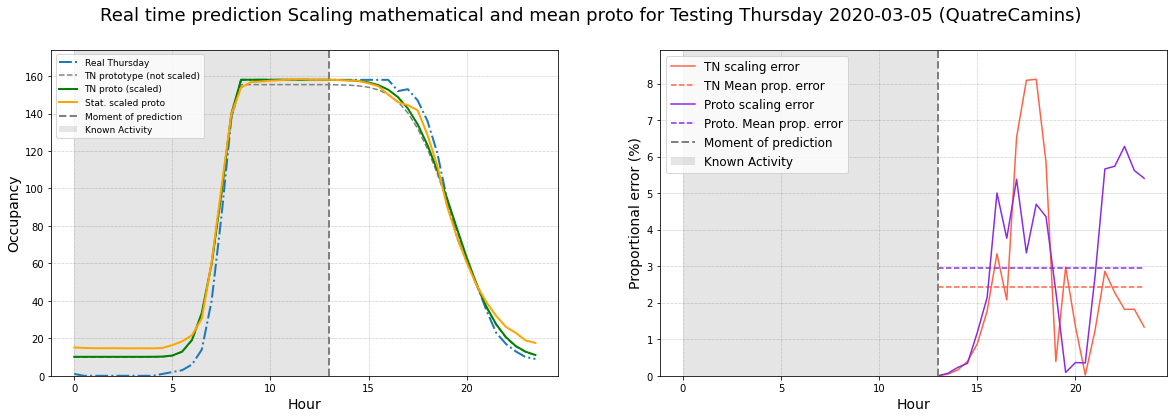

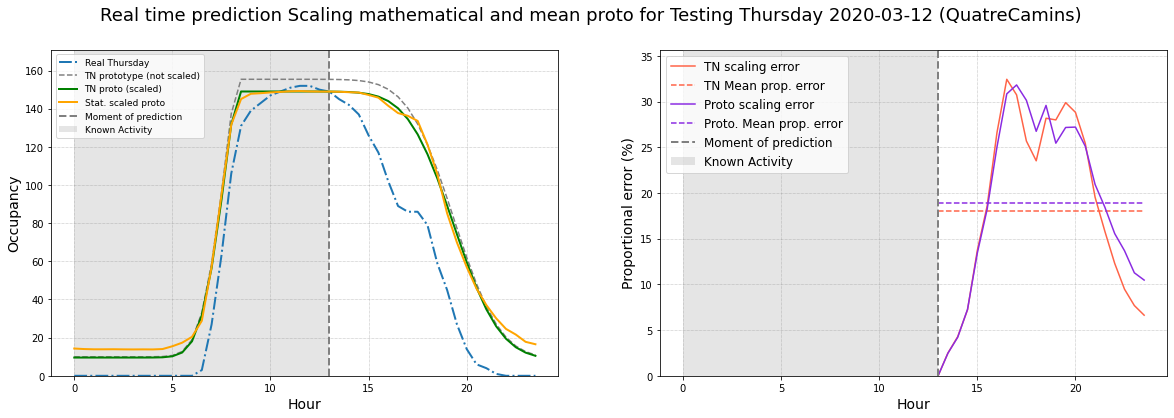

In [852]:
statistic_proto = hist_weekday_proto
tn_proto = tn_weekday
t_days = testing_thursdays
t_dates= testing_thursdays_dates
limit_hour = 13
day = 'Thursday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], hist_weekday_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = hist_weekday_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1
    

### FRIDAY

2020-02-28
Real Friday scaled prtotype error:  4.35 %
Real Friday scaled prtotype STDV:  3.2930930942569523
Real Friday scaled TN error:  3.06 %
Real Friday scaled TN STDV:  1.7047126964496262
_____________________________________________________________
2020-03-06
Real Friday scaled prtotype error:  2.83 %
Real Friday scaled prtotype STDV:  1.6753713290177477
Real Friday scaled TN error:  5.56 %
Real Friday scaled TN STDV:  3.8490106636688117
_____________________________________________________________
2020-03-13
Real Friday scaled prtotype error:  3.09 %
Real Friday scaled prtotype STDV:  1.5936627323056942
Real Friday scaled TN error:  2.61 %
Real Friday scaled TN STDV:  1.4924719319572268
_____________________________________________________________


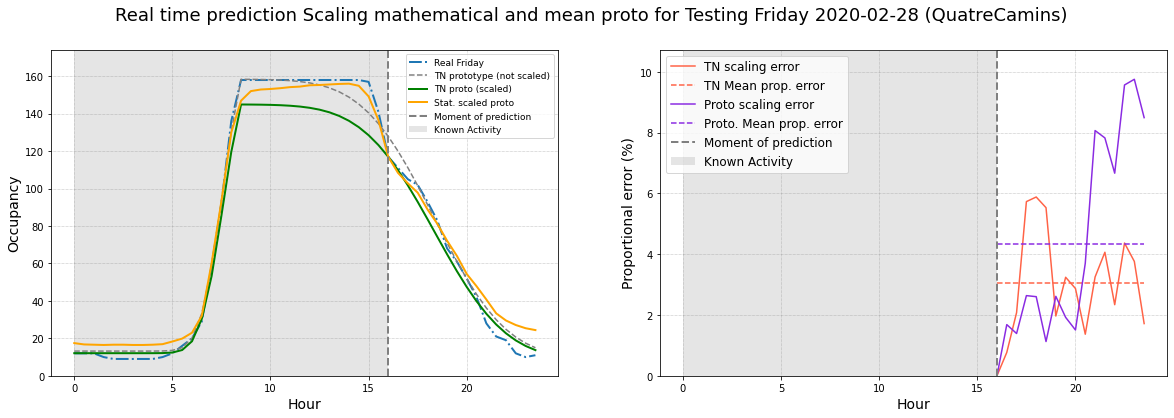

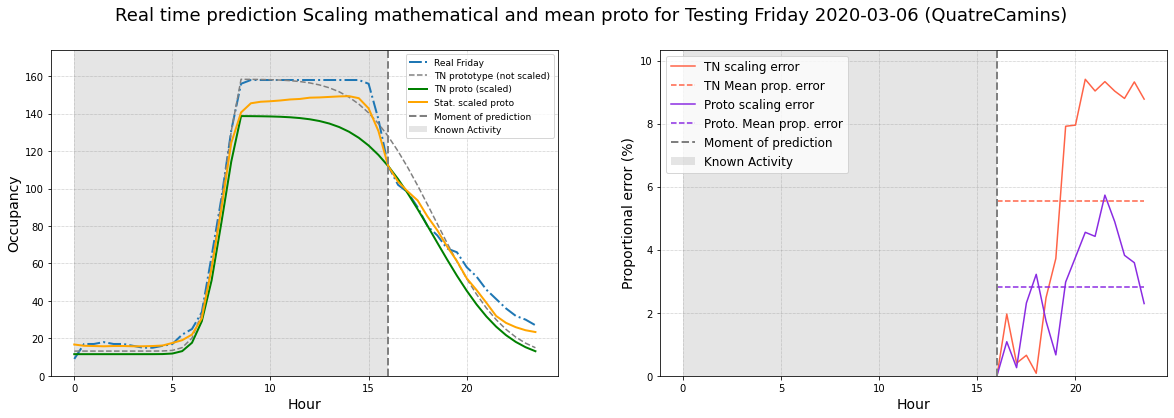

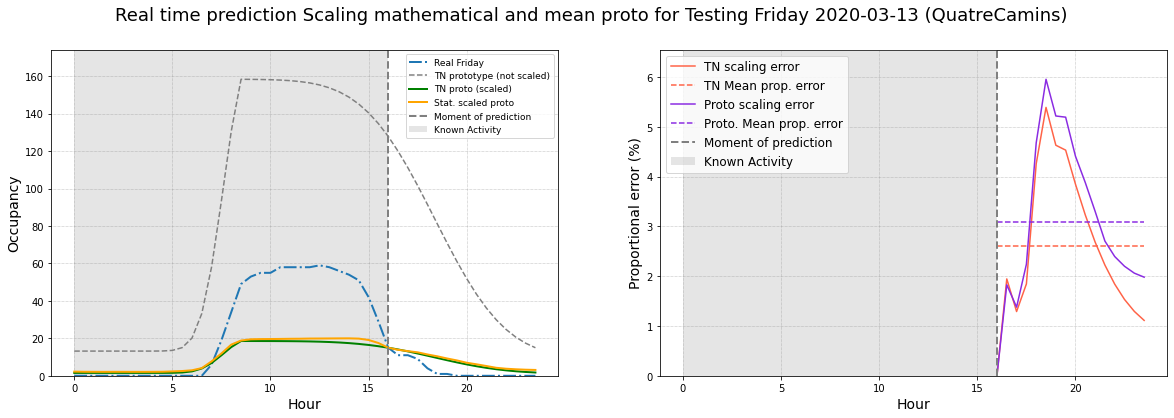

In [853]:
statistic_proto = hist_friday_proto
tn_proto = tn_friday
t_days = testing_fridays
t_dates=testing_fridays_dates
limit_hour = 16
day = 'Friday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
  
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1
    

### WEEKEND

### SATURDAY

2020-02-22
Real Saturday scaled prtotype error:  2.99 %
Real Saturday scaled prtotype STDV:  2.403517530446649
Real Saturday scaled TN error:  2.71 %
Real Saturday scaled TN STDV:  1.8338384060941846
_____________________________________________________________
2020-02-29
Real Saturday scaled prtotype error:  2.1 %
Real Saturday scaled prtotype STDV:  2.1865202491097264
Real Saturday scaled TN error:  1.9 %
Real Saturday scaled TN STDV:  1.8678280089808843
_____________________________________________________________


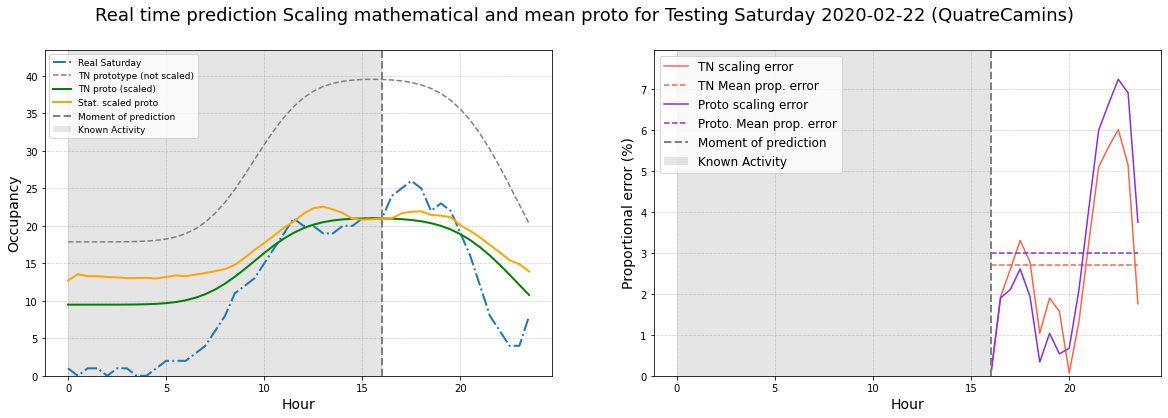

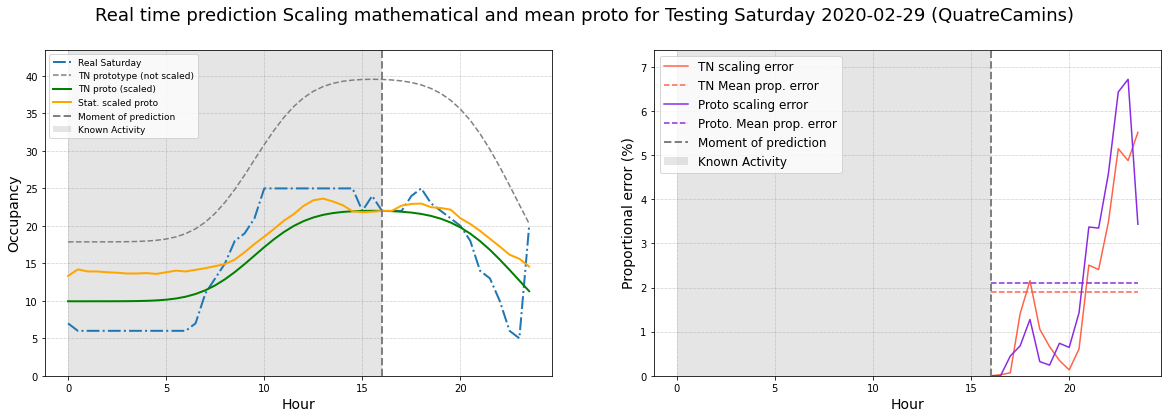

In [854]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_saturdays
t_dates= testing_saturdays_dates
limit_hour = 16
day = 'Saturday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
        
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

### SUNDAY

2020-02-23
Real Sunday scaled prtotype error:  3.97 %
Real Sunday scaled prtotype STDV:  2.2198140752279336
Real Sunday scaled TN error:  4.24 %
Real Sunday scaled TN STDV:  2.0349165566985308
_____________________________________________________________
2020-03-01
Real Sunday scaled prtotype error:  3.63 %
Real Sunday scaled prtotype STDV:  2.686988051060659
Real Sunday scaled TN error:  3.41 %
Real Sunday scaled TN STDV:  2.8637180632884323
_____________________________________________________________
2020-03-08
Real Sunday scaled prtotype error:  2.81 %
Real Sunday scaled prtotype STDV:  2.256061162461584
Real Sunday scaled TN error:  2.23 %
Real Sunday scaled TN STDV:  1.810323390124233
_____________________________________________________________


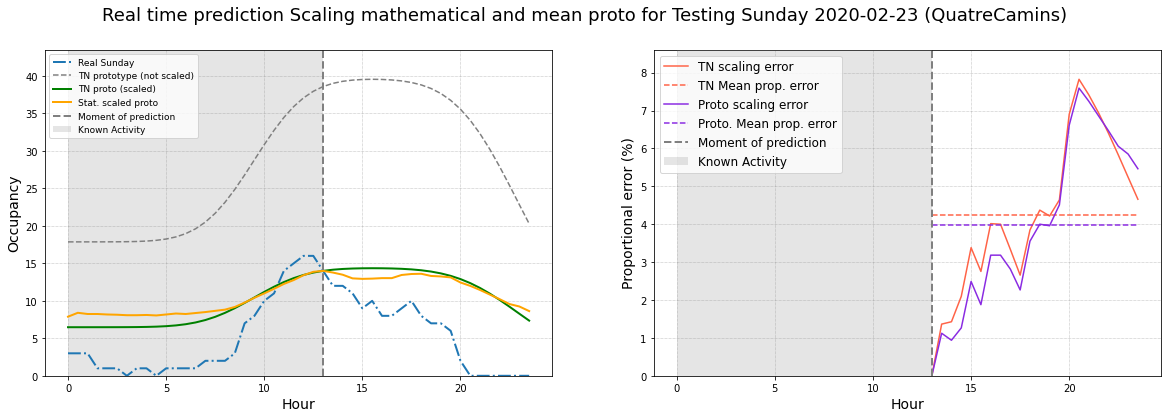

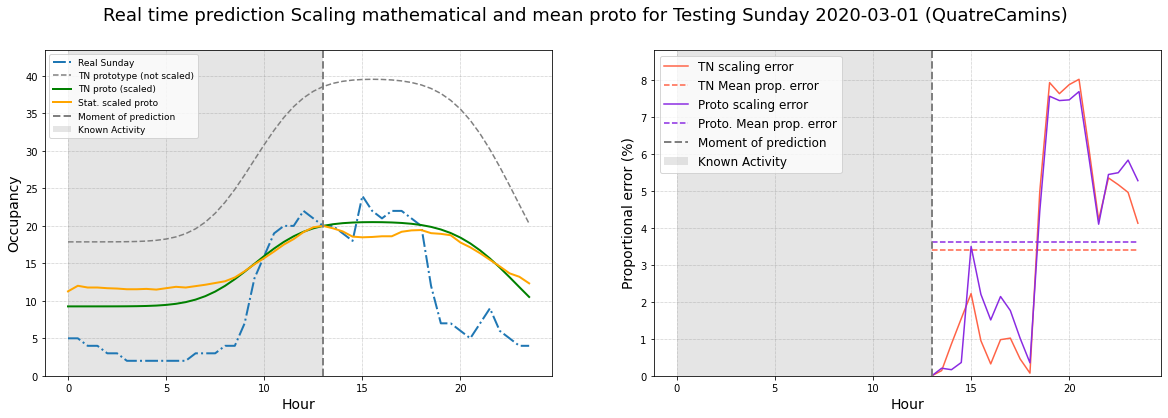

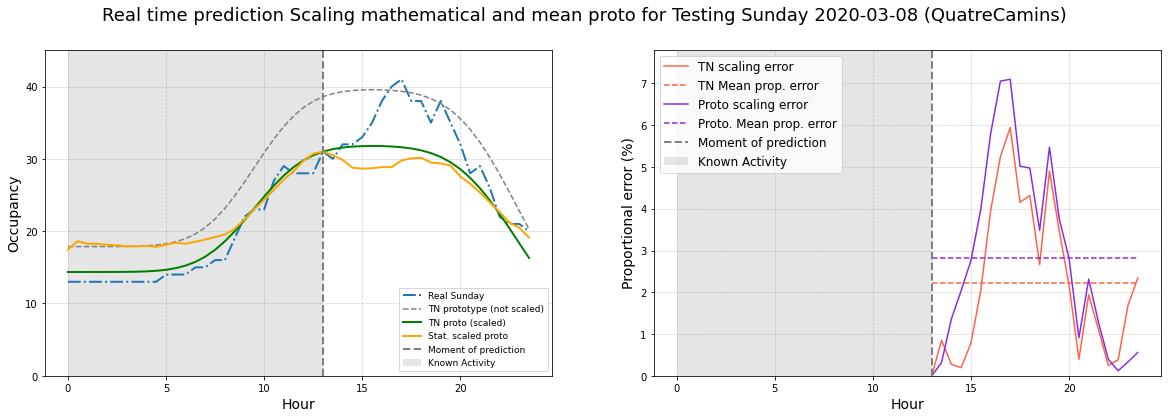

In [855]:
statistic_proto = hist_weekend_proto
tn_proto = tn1_weekend
t_days = testing_sundays
t_dates= testing_sundays_dates
limit_hour = 13
day = 'Sunday'
# Negative values to 0
for i in range(0,len(tn_proto)):
    if tn_proto[i] < 0:
        tn_proto[i] = 0
    
cont=0
for i in range(0,len(t_days)):
    t_date=t_dates[cont]
    print(t_date)
    tn_scaling = get_scaling_factor(limit_hour, t_days[i], tn_proto)
    stat_scaling = get_scaling_factor(limit_hour, t_days[i], statistic_proto.values)
    
    scaled_tn_proto = tn_proto * tn_scaling
    scaled_stat_proto = statistic_proto.values * stat_scaling
    fig, ax = plt.subplots(1, 2)
    fig.set_figwidth(20)
    fig.set_figheight(6)
    axx=0;
    real_timing_predition(fig, ax, axx, day, tn_proto, t_days[i], scaled_tn_proto, scaled_stat_proto, limit_hour, t_date)
    #ax[0].set_ylim([0,axis_ylim_we])
    axx=1;
    errors_plotting(fig, ax, axx, scaled_tn_proto, scaled_stat_proto, t_days[i], day, limit_hour)
    cont=cont+1

# Store protos, params, areas and offsets

In [856]:
# df_prototypes = pd.read_csv('data/prototypes_new.csv')
# index = 0

# weekday_tn_params = ','.join(str(e) for e in list(res_weekday.x))
# friday_tn_params  = ','.join(str(e) for e in list(res_friday.x))
# weekend_tn_params = ','.join(str(e) for e in list(res_weekend.x))

# weekday_mean_area = weekday_area
# friday_mean_area  = friday_area
# weekend_mean_area = weekend_area

# weekday_mean_offset = weekday_offset
# friday_mean_offset  = friday_offset
# weekend_mean_offset = weekend_offset

# total_wave_weekday_s = ','.join(str(e) for e in tn_weekday.tolist())
# total_wave_weekend_s = ','.join(str(e) for e in tn1_weekend.tolist())
# total_wave_friday_s  = ','.join(str(e) for e in tn_friday.tolist())

# historical_weekday_s = ','.join(str(e) for e in hist_weekday_proto.tolist())
# historical_weekend_s = ','.join(str(e) for e in hist_weekend_proto.tolist())
# historical_friday_s  = ','.join(str(e) for e in hist_friday_proto.tolist())


# df_prototypes.at[index,'CDF subtraction_weekday_proto'] = total_wave_weekday_s
# df_prototypes.at[index,'CDF subtraction_friday_proto']  = total_wave_friday_s
# df_prototypes.at[index,'CDF subtraction_weekend_proto'] = total_wave_weekend_s

# df_prototypes.at[index,'CDF subtraction_weekday_params'] = weekday_tn_params
# df_prototypes.at[index,'CDF subtraction_friday_params']  = friday_tn_params
# df_prototypes.at[index,'CDF subtraction_weekend_params'] = weekend_tn_params

# df_prototypes.at[index,'CDF subtraction_weekday_area'] = weekday_mean_area
# df_prototypes.at[index,'CDF subtraction_friday_area']  = friday_mean_area
# df_prototypes.at[index,'CDF subtraction_weekend_area'] = weekend_mean_area

# df_prototypes.at[index,'CDF subtraction_weekday_offset'] = weekday_mean_offset
# df_prototypes.at[index,'CDF subtraction_friday_offset']  = friday_mean_offset
# df_prototypes.at[index,'CDF subtraction_weekend_offset'] = weekend_mean_offset

# df_prototypes.at[index,'Historical_weekday_proto'] = historical_weekday_s
# df_prototypes.at[index,'Historical_weekend_proto'] = historical_weekend_s
# df_prototypes.at[index,'Historical_friday_proto']  = historical_friday_s

# df_prototypes.to_csv("data/final_prototypes.csv", index=False)
# df_prototypes

In [857]:
# How to read the prorotypes: 
# string = exportable_df.at[0,'CDF subtraction_weekday_proto']
# list_of_strings = string.split(',')
# final_list = list(np.float_(list_of_strings))

In [858]:
# import pandas as pd
# df_prototypes_2 = pd.read_csv('data/prototypes_new.csv')
# new_row = {'Location':'Cerdanyola'}
# #append row to the dataframe
# df_prototypes_2 = df_prototypes_2.append(new_row, ignore_index=True)
# df_prototypes_2

In [859]:
# df_prototypes_2.to_csv("data/prototypes_new.csv", index=False)
# day = 'Monday'
# date = '2020-02-24'
# real_day = mean_of_day(day,date)
# real_day.values

In [860]:
# hist_friday_proto.tolist()